# **Analyse et Modélisation de la Mobilité Internationale des Étudiants**

## **Résumé du Projet**
Ce projet vise à analyser et modéliser les données liées à la mobilité internationale des étudiants afin de comprendre les facteurs influençant leur répartition à travers différents pays. En utilisant des techniques de fouille de données et des modèles d’apprentissage supervisé et non supervisé, nous explorons les tendances, identifions les relations significatives et construisons des modèles prédictifs.


# **Introduction et Objectif du Projet**

Ce rapport analyse un jeu de données concernant les étudiants internationaux. Le jeu de données contient 5 557 individus (lignes) et 10 variables (colonnes) de types différents. Nous allons décrire les variables, analyser des variables simples, explorer les relations entre deux variables et interpréter les résultats.

Ce rapport analyse un jeu de données concernant les étudiants internationaux. Le jeu de données contient 5557 individus (lignes) et 10 variables (colonnes) de types différents. Nous allons décrire les variables, analyser des variables simples, explorer les relations entre deux variables et interpréter les résultats.

Le jeu de données contient les variables suivantes :
Code de l'indicateur.
Indicateur :Description de l'indicateur mesuré.
LOCATION : Code du pays.
Pays : Nom du pays.
TIME : l'observation.
Temps : Année de l'observati (dupliquée de TIME).
Value : Nombre d'étudiants internationaux (variable cible).
Flag Codes : Codes spécifiques des drapeaux indicateurs supplémentaires.
Flags : Description des drapeaux.
Notes moyennes : Notes moyennes obtenues par les étudiants.

 **Importation des Bibliothèques**

In [2]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


**Chargement des Données**

In [3]:
# Chargement des données
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Les données ont été chargées avec succès depuis {file_path}.")
        return data
    except Exception as e:
        print(f"Erreur lors du chargement des données : {e}")
        return None

file_path = '/content/drive/MyDrive/TP FD/Dataset_with_International_Students.csv'
data = load_data(file_path)


Les données ont été chargées avec succès depuis /content/drive/MyDrive/TP FD/Dataset_with_International_Students.csv.


**Description Générale du Jeu de Données**

In [4]:
# Description du jeu de données
def describe_dataset(data):
    """Affiche une description générale du jeu de données."""
    print("Description du jeu de données :")
    print(f"Nombre d'individus : {data.shape[0]}")
    print(f"Nombre de variables : {data.shape[1]}")
    print("\nTypes de variables :")
    print(data.dtypes)
    print("\nStatistiques descriptives :")
    print(data.describe())
    print("\nPremières lignes du jeu de données :")
    print(data.head())

if data is not None:
    describe_dataset(data)


Description du jeu de données :
Nombre d'individus : 5557
Nombre de variables : 10

Types de variables :
NATMON_IND         object
Indicateur         object
LOCATION           object
Pays               object
TIME                int64
Temps               int64
Value             float64
Flag Codes         object
Flags              object
Notes moyennes    float64
dtype: object

Statistiques descriptives :
              TIME        Temps         Value  Notes moyennes
count  5557.000000  5557.000000  4.746000e+03     5557.000000
mean   2019.153140  2019.153140  3.025933e+04       14.973082
std       1.578557     1.578557  1.202253e+05        2.887698
min    2017.000000  2017.000000  1.000000e+00       10.000724
25%    2018.000000  2018.000000  5.100000e+01       12.519410
50%    2019.000000  2019.000000  6.545000e+02       14.935066
75%    2020.000000  2020.000000  5.404595e+03       17.473818
max    2023.000000  2023.000000  1.544520e+06       19.999640

Premières lignes du jeu de donnée

**Analyse de Variables Simples**


Distribution des étudiants internationaux par pays :
Pays
Monde                                     3.500252e+07
Pays à revenu élevé                       2.198158e+07
Amérique du Nord et Europe                1.777082e+07
Amérique du Nord et Europe occidentale    1.484745e+07
Europe                                    1.168117e+07
                                              ...     
Palestine                                 0.000000e+00
Montserrat                                0.000000e+00
Iles Vierges britanniques                 0.000000e+00
Gibraltar                                 0.000000e+00
Afghanistan                               0.000000e+00
Name: Value, Length: 152, dtype: float64

Statistiques descriptives des notes moyennes :
count    5557.000000
mean       14.973082
std         2.887698
min        10.000724
25%        12.519410
50%        14.935066
75%        17.473818
max        19.999640
Name: Notes moyennes, dtype: float64


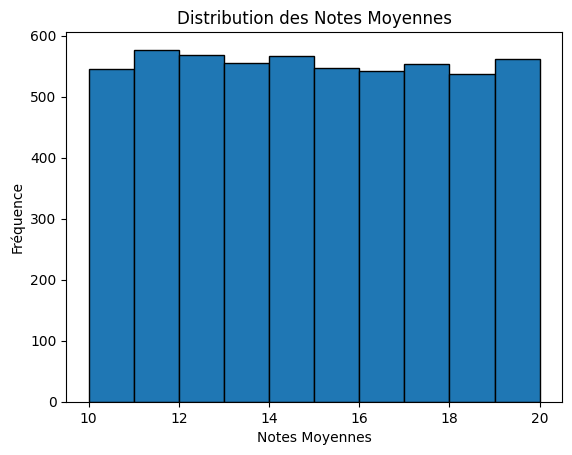

In [5]:
# Analyse de variables simples
def analyze_simple_variables(data):
    """Analyse les variables simples comme la distribution et les statistiques descriptives."""
    if 'Pays' in data.columns and 'Value' in data.columns:
        distribution_by_country = data.groupby('Pays')['Value'].sum().sort_values(ascending=False)
        print("\nDistribution des étudiants internationaux par pays :")
        print(distribution_by_country)
    else:
        print("Les colonnes 'Pays' et 'Value' sont manquantes dans les données.")

    if 'Notes moyennes' in data.columns:
        notes_moyennes_stats = data['Notes moyennes'].describe()
        print("\nStatistiques descriptives des notes moyennes :")
        print(notes_moyennes_stats)

        # Histogramme des notes moyennes
        plt.hist(data['Notes moyennes'], bins=10, edgecolor='k')
        plt.title('Distribution des Notes Moyennes')
        plt.xlabel('Notes Moyennes')
        plt.ylabel('Fréquence')
        plt.show()
    else:
        print("La colonne 'Notes moyennes' est manquante dans les données.")

if data is not None:
    analyze_simple_variables(data)


**Analyse des Relations entre Variables**


Corrélation entre le Nombre d'Étudiants Internationaux et les Notes Moyennes : 0.005


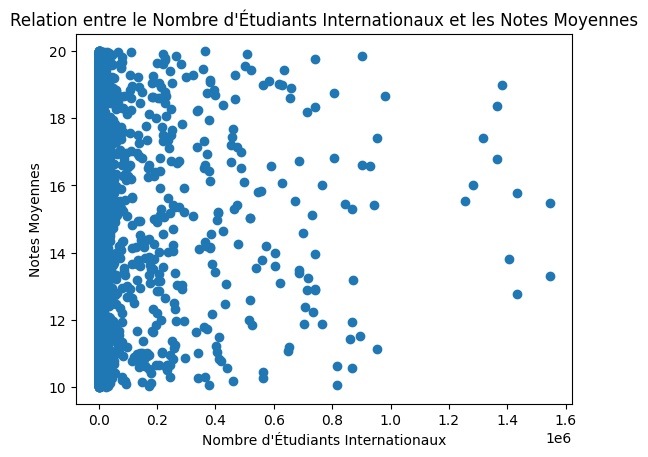

In [6]:
# Liaisons entre deux variables
def analyze_variable_relations(data):
    """Analyse les relations entre les variables via corrélation et visualisation."""
    if 'Value' in data.columns and 'Notes moyennes' in data.columns:
        correlation = data[['Value', 'Notes moyennes']].corr().loc['Value', 'Notes moyennes']
        print(f"\nCorrélation entre le Nombre d'Étudiants Internationaux et les Notes Moyennes : {correlation:.3f}")

        # Nuage de points
        plt.scatter(data['Value'], data['Notes moyennes'])
        plt.title('Relation entre le Nombre d\'Étudiants Internationaux et les Notes Moyennes')
        plt.xlabel('Nombre d\'Étudiants Internationaux')
        plt.ylabel('Notes Moyennes')
        plt.show()
    else:
        print("Les colonnes 'Value' et 'Notes moyennes' sont manquantes dans les données.")

if data is not None:
    analyze_variable_relations(data)


## **Affichage des Premières Lignes du Jeu de Données**

Affichage des premières lignes du tableau pour obtenir un aperçu des données présentes. Cela permet de vérifier les colonnes, leur ordre, et les premières valeurs, ce qui est utile pour comprendre rapidement la structure du dataset.

In [ ]:
#affichage des premières lignes du tableau
data.head()

,NATMON_IND,Indicateur,LOCATION,Pays,TIME,Temps,Value,Flag Codes,Flags,Notes moyennes
0,E_5T8_FOREIGN_ORG99000000,Etudiants internationaux dans le pays d'accuei...,CUB,Cuba,2017,2017,89.0,NaN,NaN,15.488135
1,E_5T8_FOREIGN_ORG99000000,Etudiants internationaux dans le pays d'accuei...,CUB,Cuba,2018,2018,86.0,NaN,NaN,17.151894
2,E_5T8_FOREIGN_ORG99000000,Etudiants internationaux dans le pays d'accuei...,CUB,Cuba,2019,2019,83.0,NaN,NaN,16.027634
3,E_5T8_FOREIGN_ORG99000000,Etudiants internationaux dans le pays d'accuei...,CUB,Cuba,2020,2020,60.0,NaN,NaN,15.448832
4,E_5T8_FOREIGN_ORG99000000,Etudiants internationaux dans le pays d'accuei...,CUB,Cuba,2021,2021,69.0,NaN,NaN,14.236548


In [ ]:
#visualisation des nombres des lignes et colonnes de notre jeu de données
data.shape

(5557, 10)

In [ ]:
#voir les types des variables utiliser dans le jeu de données
data.dtypes

,0
NATMON_IND,object
Indicateur,object
LOCATION,object
Pays,object
TIME,int64
Temps,int64
Value,float64
Flag Codes,object
Flags,object
Notes moyennes,float64


In [ ]:
#analyse de données manquantes dans notre jeu de données
data.isnull().sum()

,0
NATMON_IND,0
Indicateur,0
LOCATION,0
Pays,0
TIME,0
Temps,0
Value,811
Flag Codes,4630
Flags,4630
Notes moyennes,0


In [ ]:
#analyse descriptive du jeu de données
data.describe()

,TIME,Temps,Value,Notes moyennes
count,5557.000000,5557.000000,4.746000e+03,5557.000000
mean,2019.153140,2019.153140,3.025933e+04,14.973082
std,1.578557,1.578557,1.202253e+05,2.887698
min,2017.000000,2017.000000,1.000000e+00,10.000724
25%,2018.000000,2018.000000,5.100000e+01,12.519410
50%,2019.000000,2019.000000,6.545000e+02,14.935066
75%,2020.000000,2020.000000,5.404595e+03,17.473818
max,2023.000000,2023.000000,1.544520e+06,19.999640


In [ ]:
#description des variables qualitatives
data.describe(include='object')

,NATMON_IND,Indicateur,LOCATION,Pays,Flag Codes,Flags
count,5557,5557,5557,5557,927,927
unique,9,9,153,152,4,4
top,E_5T8_FOREIGN_ORG40525,Etudiants internationaux dans le pays d'accuei...,HKG,Bosnie-Herzégovine,n,Chiffre nul ou négligeable
freq,620,620,54,54,791,791


<Axes: >

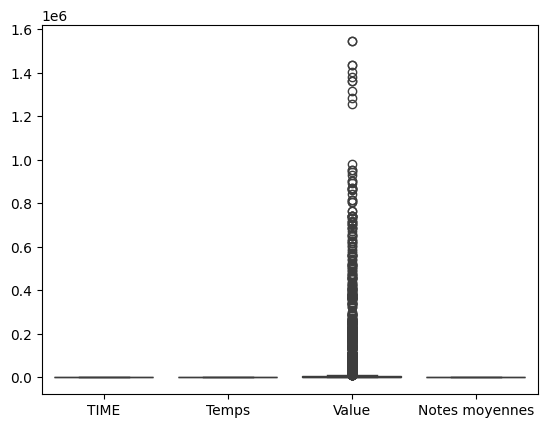

In [ ]:
#analyse descriptive des variables quantitatives
sns.boxplot(data=data)

dans le graphique ci-dessous nous avons une répartition des enregistrements par année (TIME). On observe une diminution des données après 2020, avec une chute significative en 2022 et très peu de données en 2023, ce qui pourrait indiquer une baisse des étudiants internationaux ou des enregistrements de données pour ces années.

<Axes: xlabel='TIME', ylabel='count'>

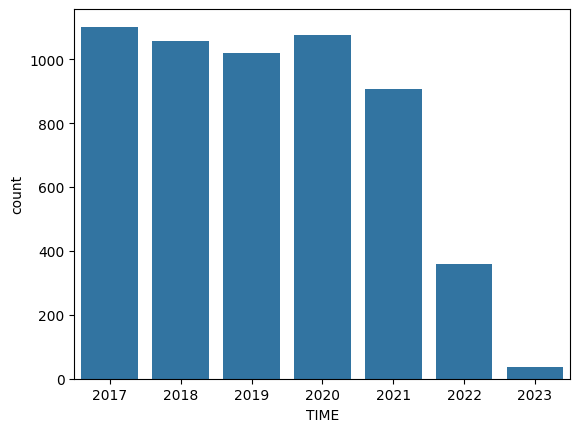

In [ ]:
#analyse qualitative

sns.countplot(x=data['TIME'])

## **Analyse de la Normalité des Variables Numériques**

Analyse de la normalité des variables numériques dans le dataset en deux étapes :

1. **Visualisation** :
   - Un histogramme avec une courbe de densité (`kde=True`) est généré pour chaque variable numérique afin d'observer sa distribution.

2. **Test de Normalité** :
   - Un test de normalité (`stats.normaltest`) est effectué pour chaque variable.  
   - **Interprétation** :
     - Si la p-value est inférieure à 0.05, la variable ne suit pas une loi normale.
     - Sinon, la variable suit une loi normale.

Ce processus permet de vérifier si les données respectent l'hypothèse de normalité, essentielle pour certaines analyses statistiques.


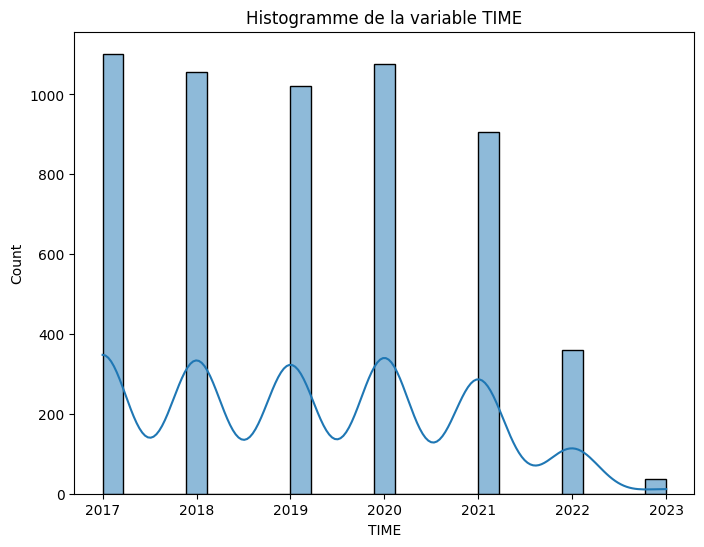

La variable TIME ne suit pas une loi normale (p-value=0.0)


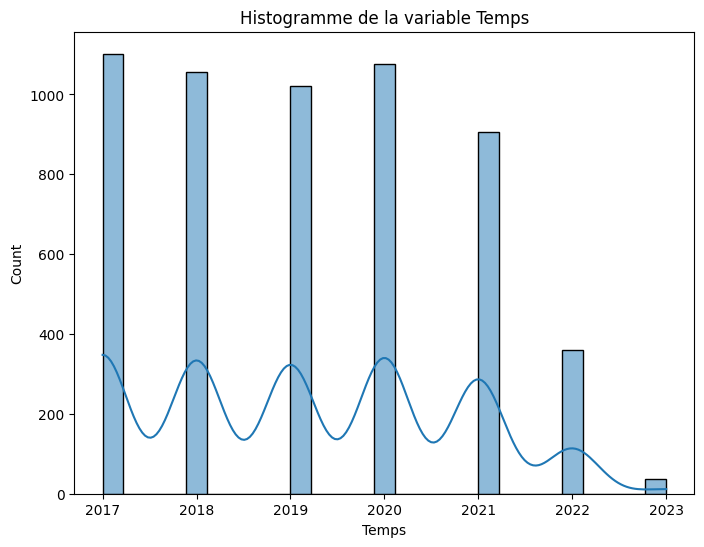

La variable Temps ne suit pas une loi normale (p-value=0.0)


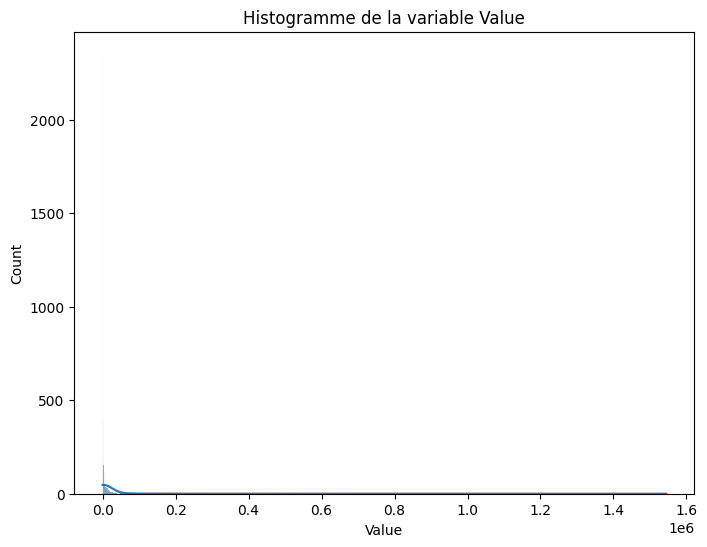

La variable Value suit une loi normale (p-value=nan)


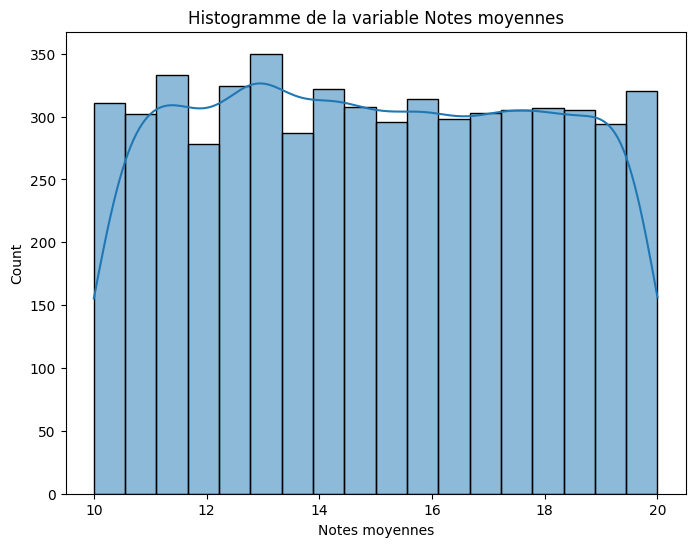

La variable Notes moyennes ne suit pas une loi normale (p-value=0.0)


In [ ]:

# Analyse de la normalité
# Sélectionne uniquement les colonnes numériques
numeric_columns = data.select_dtypes(include='number').columns

# Création d'un histogramme et d'un test de normalité pour chaque variable numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    # Test de normalité
    statistic, p_value = stats.normaltest(data[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

## **Analyse des Fréquences et Visualisation Circulaire pour la Variable "TIME"**

1. **Création d'un Tableau de Fréquences** :
   - La proportion des occurrences pour chaque valeur unique de la variable `TIME` est calculée.
   - Le tableau de fréquences obtenu est divisé par la taille totale des données pour exprimer les proportions en pourcentage.

2. **Visualisation Circulaire** :
   - Un diagramme circulaire (pie chart) est généré pour représenter graphiquement les proportions calculées.

Cette analyse permet de visualiser la répartition des observations en fonction des années dans le dataset.


([<matplotlib.patches.Wedge at 0x7b1bea1cc700>,
 [Text(0.8933420499499205, 0.6418255072769186, '2017'),
  Text(-0.3077083863476397, 1.0560850102957298, '2020'),
  Text(-1.0963062081516242, 0.09007051664228434, '2018'),
  Text(-0.5065513523094877, -0.9764249727825633, '2019'),
  Text(0.6314295480770591, -0.900720115138549, '2021'),
  Text(1.06750735827065, -0.2653828179027761, '2022'),
  Text(1.099772199858357, -0.022385451049958333, '2023')])

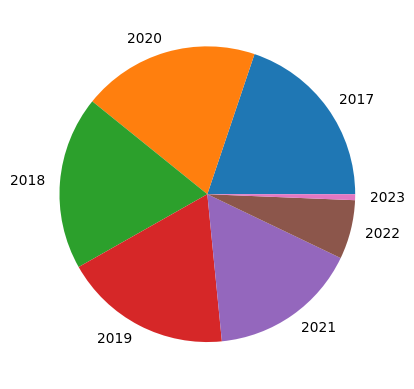

In [ ]:
# Création d'un tableau de fréquences pour la variable "species"
freq_table = (data['TIME'].value_counts())/len(data)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence


plt.pie(freq_table,labels=freq_table.index)

Dans le diagramme circulaire (camembert) ci-haut nous voyons la répartition des enregistrements par année dont nous remarquons 2017 est Représentée par une grande portion du cercle (bleu), indiquant une proportion significative des données.2018 : En vert, également une grande portion, similaire à 2017. 2019 : En rouge, encore une grande portion, indiquant une part importante des données. 2020 : En orange, la plus grande portion, indiquant qu'il y a eu plus d'enregistrements cette année-là. 2021 : En violet, représentant une part importante mais légèrement moins que les autres grandes portions. 2022 : En marron, une plus petite portion du cercle. 2023 : En rose, une portion très petite, indiquant très peu de données pour cette année.

## **Analyse des Relations entre les Variables Quantitatives**

L'analyse des relations entre les variables quantitatives est réalisée à l'aide d'une matrice de relations.

1. **Distributions univariées** :
   - Les graphiques diagonaux montrent la distribution de chaque variable quantitative, permettant d'observer leur répartition.

2. **Relations bivariées** :
   - Les autres graphiques de la matrice mettent en évidence les relations entre paires de variables, permettant d'identifier des corrélations, des tendances ou des regroupements dans les données.


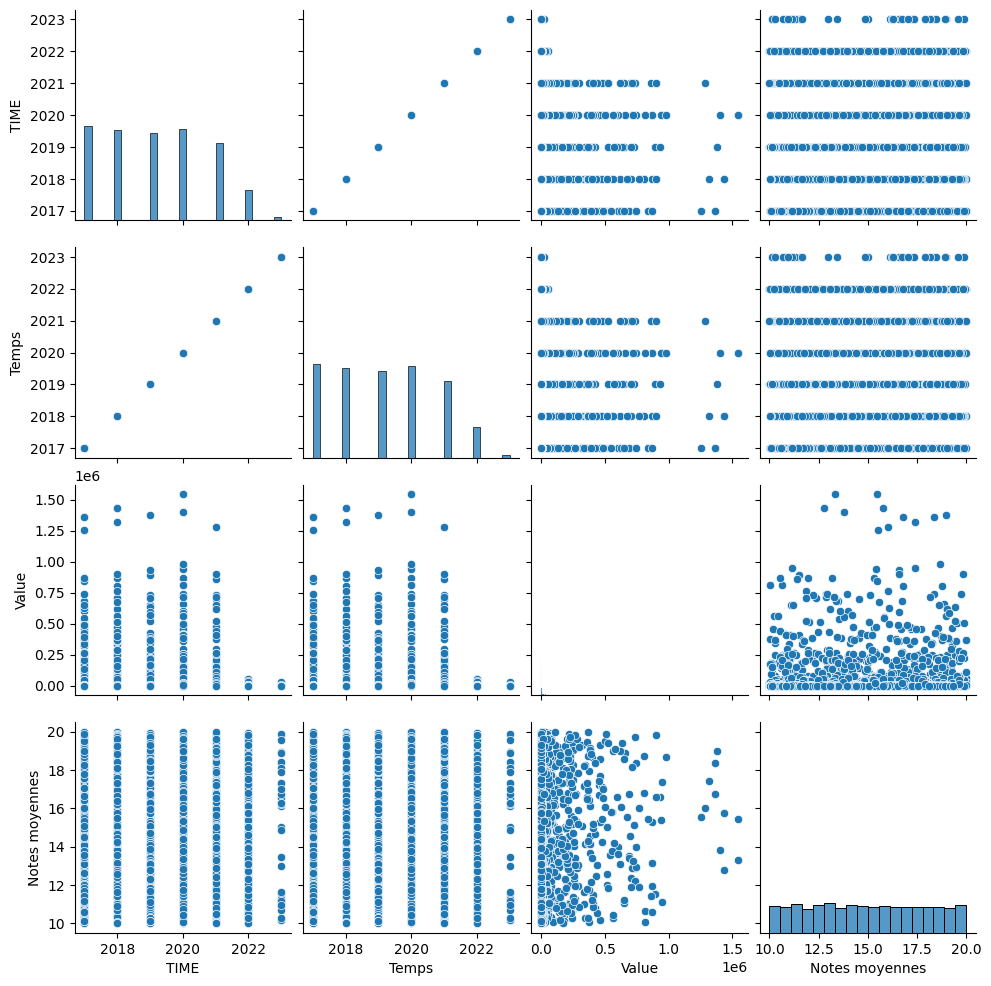

In [ ]:
#relation entre les variables quantitatives
sns.pairplot(data)

Les graphiques présentés ci-haut montrent une analyse des relations et des distributions des variables dans notre jeu de données. en quelques lignes voici une interprétation générale : Les histogrammes diagonaux illustrent les distributions des variables individuelles. On observe une forte concentration des valeurs pour certaines années et des variations notables dans les enregistrements. Les diagrammes de dispersion révèlent des relations entre les différentes variables. Par exemple, il y a une concentration de valeurs élevées pour certaines années, tandis que d'autres années montrent une diminution significative des enregistrements. La variable Value montre une distribution très asymétrique avec une majorité de petites valeurs et quelques valeurs très élevées, suggérant des outliers ou des valeurs extrêmes. Les Notes moyennes sont relativement uniformes, mais montrent aussi une légère variation en fonction des autres variables.


## **Analyse des Corrélations entre les Variables Numériques**

L'analyse des corrélations entre les variables numériques permet de comprendre les relations linéaires entre ces dernières. Cette étape comprend :

1. **Sélection des Variables Numériques** :
   - Seules les colonnes contenant des données de type numérique (float ou int) sont prises en compte pour cette analyse.

2. **Calcul de la Matrice de Corrélation** :
   - Une matrice de corrélation est générée, indiquant les coefficients de corrélation de Pearson entre chaque paire de variables numériques.

3. **Visualisation avec une Heatmap** :
   - Une heatmap est tracée pour représenter visuellement les corrélations, où :
     - Les valeurs proches de 1 indiquent une forte corrélation positive.
     - Les valeurs proches de -1 indiquent une forte corrélation négative.
     - Les valeurs proches de 0 indiquent une faible ou aucune corrélation.

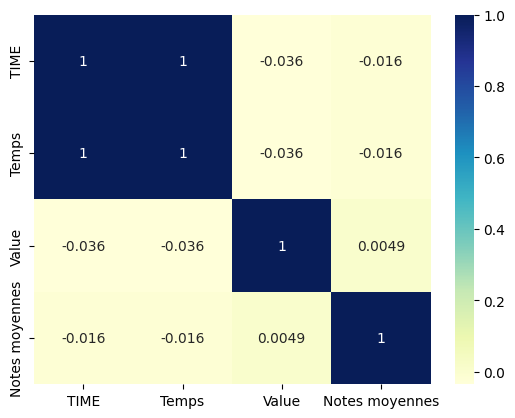

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=[float, int])

# Calculer la matrice de corrélation
corr_matrix = numeric_data.corr()

# Tracer la heatmap de la matrice de corrélation
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()


In [ ]:
# Importation des packages nécessaires
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## **Visualisation des Variations des Variables par Année avec des Boxplots**

Pour comprendre la distribution des variables quantitatives et leurs variations en fonction des années, une analyse visuelle par boxplots est réalisée.

### **Étapes de l'Analyse** :
1. **Traitement des Données** :
   - Les lignes contenant des valeurs manquantes sont supprimées pour garantir la qualité des visualisations.

2. **Organisation des Sous-Graphes** :
   - Le nombre de sous-graphes est déterminé automatiquement en fonction du nombre de variables et organisé en une grille.

3. **Création des Boxplots** :
   - Un boxplot est généré pour chaque variable en fonction de l'année (`TIME`), permettant de :
     - Visualiser la répartition des données pour chaque année.
     - Identifier les éventuelles anomalies ou outliers.
     - Observer les tendances ou variations interannuelles.

4. **Optimisation de l'Affichage** :
   - Les sous-graphes inutilisés sont supprimés.
   - Les axes et titres sont personnalisés pour une meilleure clarté.

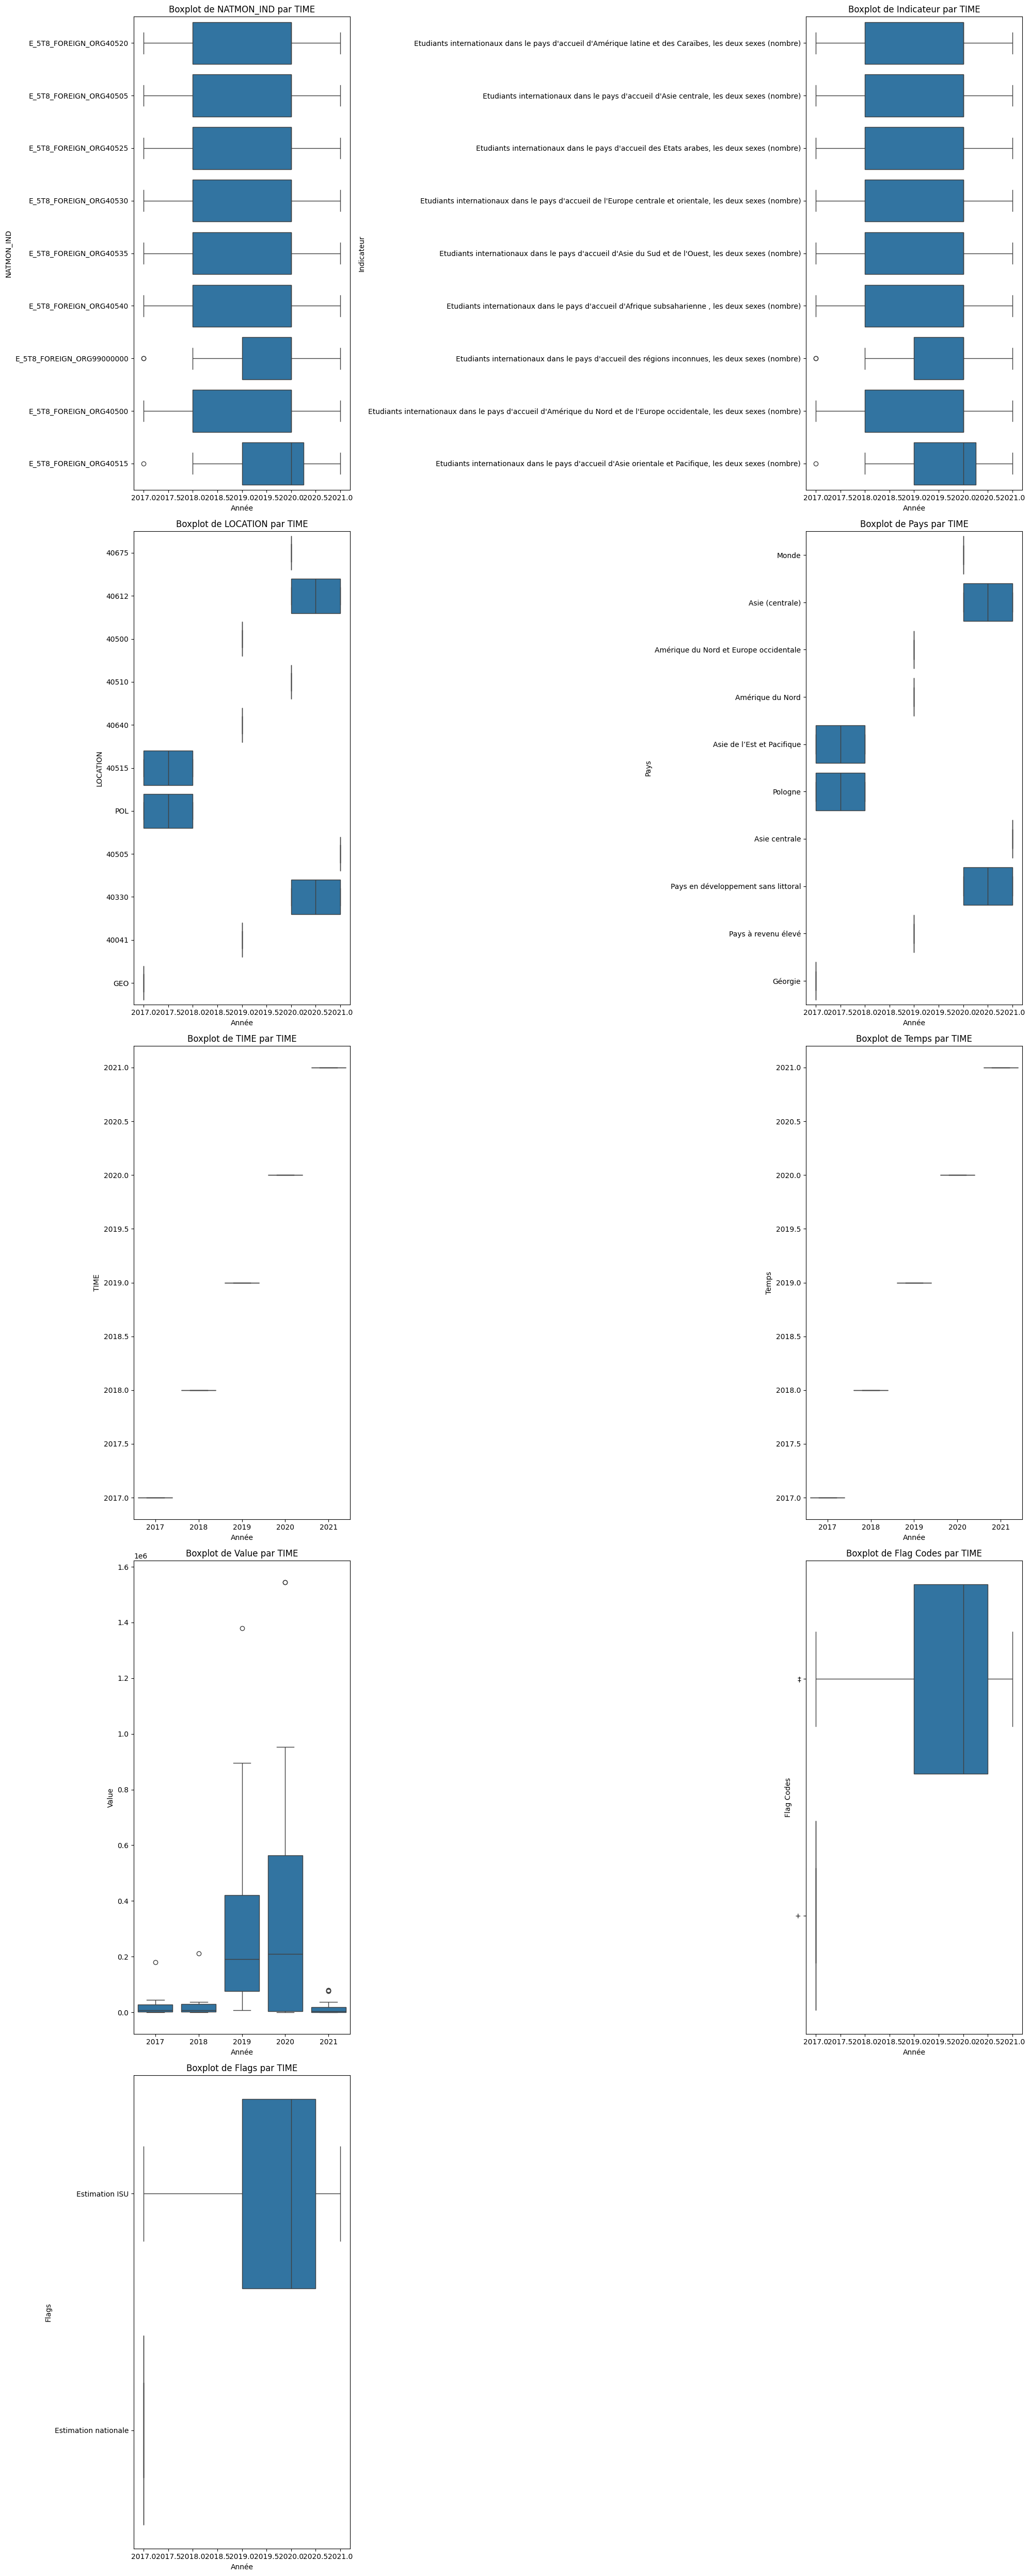

In [ ]:


# Suppression des lignes contenant des valeurs manquantes
data = data.dropna()

# Nombre de variables à tracer (excluant la dernière colonne 'TIME')
num_vars = len(data.columns) - 1

# Calculer le nombre de lignes et de colonnes nécessaires pour les sous-graphes
num_cols = 2
num_rows = (num_vars + num_cols - 1) // num_cols

# Création des sous-graphes pour les boxplots
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10 * num_rows))

# Parcourir les variables et créer les boxplots
for i in range(num_vars):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data['TIME'], y=data[data.columns[i]], ax=ax[row, col])
    ax[row, col].set_title(f"Boxplot de {data.columns[i]} par TIME")
    ax[row, col].set_xlabel('Année')  # Ajout d'étiquettes pour l'axe x
    ax[row, col].set_ylabel(data.columns[i])  # Ajout d'étiquettes pour l'axe y

# Supprimer les sous-graphes inutilisés
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(ax.flatten()[i])

plt.tight_layout()
plt.show()

## **Visualisation des Relations entre Variables avec un Pairplot**

Un pairplot est utilisé pour explorer les relations entre plusieurs variables numériques dans le jeu de données. Cette visualisation permet de détecter des corrélations, des regroupements ou des tendances.


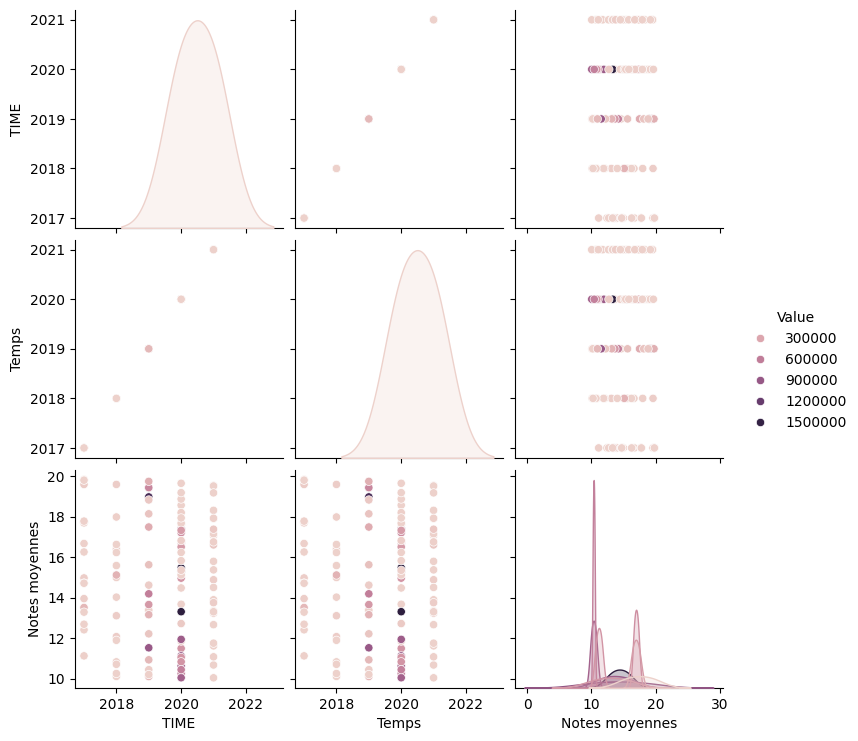

In [ ]:
# pairplot

p=sns.pairplot(data, hue = 'Value')

Le graphique pairplot montre les relations entre les variables TIME, Temps, et Notes moyennes dans notre jeu de données, avec la variable Value indiquée par différentes intensités de couleur. On observe que les années 2017 à 2021 ont des valeurs plus concentrées, tandis que 2022 et 2023 ont beaucoup moins de données. Les Notes moyennes sont assez uniformes et ne montrent pas de forte variation en fonction des années ou des valeurs. Les points plus foncés indiquent des valeurs plus élevées, mais ils sont rares, ce qui suggère que la majorité des valeurs sont faibles. Les distributions le long des diagonales montrent une forte concentration autour des valeurs plus basses, notamment pour les Notes moyennes et les valeurs pour chaque année.

## **Séparation des Données et Standardisation**

### **Étape 1 : Séparation des Données**
Les données sont divisées en :
- **Variables explicatives (`X`)** : Incluent les colonnes pertinentes utilisées pour prédire la variable cible.
- **Variable cible (`Y`)** : Correspond à la colonne représentant la variable qualitative à prédire.

### **Étape 2 : Standardisation des Données**
La standardisation est effectuée pour :
- Centrer les données autour de 0.
- Normaliser l'échelle des variables explicatives.

In [ ]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
#X = data.iloc[:, :-1].values
X = data.drop(data.columns[[0,1,2,3,7, 8]], axis=1).values
#y = data.iloc[:, -1].values
y = data.drop(data.columns[[0,1,2,3,7, 8]], axis=1).values

In [ ]:
# Standardisation des données
# Normaliser les données
print(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


[[2.02000000e+03 2.02000000e+03 4.11311667e+05 1.14944830e+01]
 [2.02000000e+03 2.02000000e+03 5.48890000e+04 1.18563594e+01]
 [2.02100000e+03 2.02100000e+03 7.63580000e+04 1.95279166e+01]
 [2.01900000e+03 2.01900000e+03 2.48915782e+05 1.74866362e+01]
 [2.02000000e+03 2.02000000e+03 4.53741783e+05 1.66991655e+01]
 [2.01900000e+03 2.01900000e+03 2.63117647e+05 1.33815895e+01]
 [2.01700000e+03 2.01700000e+03 3.15648560e+04 1.49739137e+01]
 [2.01800000e+03 2.01800000e+03 2.89311514e+04 1.63947252e+01]
 [2.01700000e+03 2.01700000e+03 2.57000000e+02 1.24141862e+01]
 [2.01800000e+03 2.01800000e+03 3.10000000e+02 1.66250457e+01]
 [2.01900000e+03 2.01900000e+03 9.62451815e+04 1.81367865e+01]
 [2.02000000e+03 2.02000000e+03 8.67242960e+05 1.52893993e+01]
 [2.02100000e+03 2.02100000e+03 5.78000000e+02 1.37824517e+01]
 [2.01700000e+03 2.01700000e+03 3.48585811e+04 1.77308355e+01]
 [2.01800000e+03 2.01800000e+03 3.56355940e+04 1.95874092e+01]
 [2.02000000e+03 2.02000000e+03 3.95333333e+03 1.856276

## **Prétraitement des Données et Analyse en Composantes Principales (PCA)**

### **Étape 1 : Gestion des Données Manquantes**
- Les lignes contenant des valeurs manquantes dans la variable cible (`TIME`) sont supprimées.
- Les valeurs manquantes dans les caractéristiques sont remplacées par la moyenne de chaque colonne à l’aide de l’imputation.

### **Étape 2 : Préparation des Données**
1. **Séparation des Données** :
   - Les colonnes explicatives (`X`) et la cible (`Y`) sont séparées.
   - Les colonnes catégorielles dans `X` sont converties en colonnes numériques grâce à l'encodage (`get_dummies`).

2. **Standardisation** :
   - Les variables explicatives sont standardisées pour centrer les données et réduire l'effet des échelles disproportionnées.

### **Étape 3 : Réduction de la Dimensionnalité avec PCA**
- L'Analyse en Composantes Principales (PCA) est appliquée pour réduire le nombre de dimensions à 4, tout en conservant le maximum de variance possible.

### **Étape 4 : Analyse des Valeurs Propres**
- Les dimensions principales sont analysées via leurs valeurs propres et leurs contributions à la variance totale. Les résultats incluent :
  - Les dimensions principales.
  - Les valeurs propres associées.
  - Le pourcentage de variance expliquée par chaque dimension.
  - Le pourcentage cumulatif de variance expliquée.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Supprimer les lignes contenant des valeurs manquantes dans la cible
data = data.dropna(subset=['TIME'])

# Séparer les caractéristiques (features) et la cible (target)
X = data.drop('TIME', axis=1)  # Remplacez 'TIME' par le nom de la colonne cible
y = data['TIME']

# Convertir les colonnes catégorielles en colonnes numériques
X = pd.get_dummies(X, drop_first=True)

# Remplir les valeurs manquantes avec la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(pca.n_components_)],
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100, 2),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

comp


,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.288117,10.63,10.63
1,Dim2,3.160928,7.83,18.46
2,Dim3,2.910870,7.21,25.68
3,Dim4,2.706739,6.71,32.39


## **Scree Plot pour le Choix des Composantes Principales**

Un scree plot est utilisé pour visualiser la variance expliquée par chaque composante principale, ce qui aide à déterminer le nombre optimal de dimensions à conserver lors de l'Analyse en Composantes Principales (PCA).

### **Éléments Clés :**
1. **Barres de Variance** :
   - Chaque barre représente le pourcentage de variance expliqué par une composante principale spécifique.
   
2. **Ligne de Référence** :
   - Une ligne horizontale est tracée à 25 % pour indiquer le seuil minimum attendu pour chaque composante, en supposant une répartition équitable de la variance (100 % divisés par 4 dimensions).

3. **Annotations** :
   - Les annotations visuelles renforcent l'interprétation du seuil de 25 %, facilitant l'identification des composantes pertinentes.


<ipython-input-22-680ad1c6b83e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sns.barplot(x = "Dimension",
<ipython-input-22-680ad1c6b83e>:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  g_comp = sns.barplot(x = "Dimension",


Text(3.25, 26, '25%')

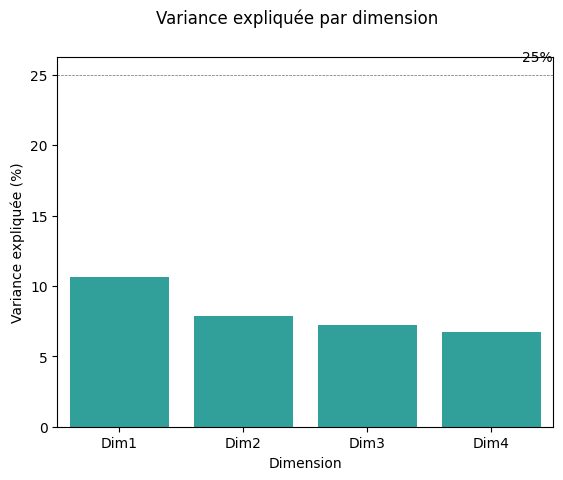

In [ ]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension",
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")


Le graphique montre la variance expliquée par chaque dimension dans notre analyse, qui est issue d'une analyse en composantes principales (PCA). Chaque dimension (Dim1, Dim2, Dim3, Dim4) explique une très faible portion de la variance totale, chacune étant inférieure à 5%. Cela suggère que chaque dimension individuelle contribue peu à la variabilité totale des données. Le total de la variance expliquée par les quatre dimensions est aussi très faible, indiquant que les variables principales ne capturent pas une part significative de la variabilité dans notre jeu de données.

## **Analyse des Cosinus Carrés des Variables pour les Composantes Principales**

L'analyse des cosinus carrés permet d'évaluer l'importance relative de chaque variable dans la construction des composantes principales lors de l'Analyse en Composantes Principales (ACP).

### **Étapes de l'Analyse** :
1. **Sélection des Variables** :
   - Les 10 premières variables numériques du dataset sont sélectionnées pour l'ACP.
   - Les colonnes non numériques sont exclues pour garantir la compatibilité.

2. **Application de l'ACP** :
   - L'ACP est réalisée sur les variables sélectionnées pour réduire la dimensionnalité tout en conservant l'essentiel de la variance.

3. **Calcul des Cosinus Carrés** :
   - Les cosinus carrés sont obtenus en élevant au carré les coefficients des composantes principales.
   - Ils indiquent la contribution relative de chaque variable dans la formation de chaque composante.

4. **Visualisation** :
   - Un tableau montre les cosinus carrés des variables pour chaque composante principale.
   - Une heatmap est utilisée pour visualiser l'importance relative des variables.

Types de données : NATMON_IND         object
Indicateur         object
LOCATION           object
Pays               object
TIME                int64
Temps               int64
Value             float64
Flag Codes         object
Flags              object
Notes moyennes    float64
dtype: object
Nombre de colonnes numériques sélectionnées: 4
             TIME         Temps         Value  Notes moyennes
PC1  2.165402e-13  2.165402e-13  1.000000e+00    1.029506e-12
PC2  8.261137e-06  8.261057e-06  1.024068e-12    9.999835e-01
PC3  4.999993e-01  4.999842e-01  4.385185e-13    1.652219e-05
PC4  4.999924e-01  5.000076e-01  2.491902e-23    4.358100e-16


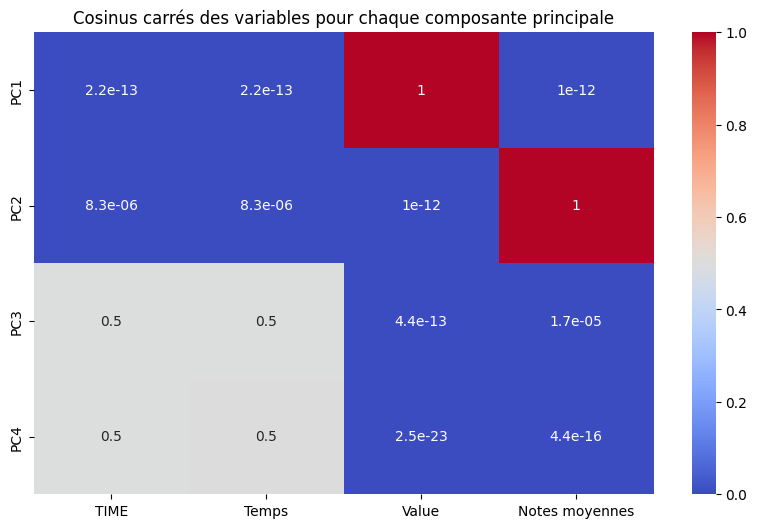

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des 10 premières variables
selected_data = data.iloc[:, :10]

# Vérification des types de données
print("Types de données :", selected_data.dtypes)

# Suppression des colonnes non numériques ou conversion si nécessaire
# Ici on ne garde que les colonnes numériques
selected_data_numeric = selected_data.select_dtypes(include=[np.number])

# Vérification si on a bien obtenu 10 colonnes numériques, sinon ajuster
print(f"Nombre de colonnes numériques sélectionnées: {selected_data_numeric.shape[1]}")

# Réalisation de l'ACP sur les données numériques sélectionnées
pca = PCA()
X_pca = pca.fit_transform(selected_data_numeric)

# np.square calcule les carrés des coefficients de chaque composante principale
cos_squared = np.square(pca.components_)

# Nombre de composantes principales extraites dans l'ACP
n_components = pca.n_components_

# Récupérer les noms des variables sélectionnées
variable_names = selected_data_numeric.columns.tolist()

# Création d'un DataFrame pandas avec le cosinus carré des variables
data_cos_squared = pd.DataFrame(cos_squared, columns=variable_names)

# Modifier les noms des lignes pour les composantes principales
data_cos_squared.index = [f'PC{i+1}' for i in range(n_components)]

# Afficher le tableau des cosinus carrés
print(data_cos_squared)

# Optionnel : visualisation des cosinus carrés pour les composantes principales
plt.figure(figsize=(10, 6))
sns.heatmap(data_cos_squared, annot=True, cmap="coolwarm")
plt.title("Cosinus carrés des variables pour chaque composante principale")
plt.show()


Le résultat montre les cosinus carrés pour les variables par rapport aux composantes principales. Par exemple, pour la composante principale PC1, les cosinus carrés sont de 0.002542 pour la variable PCA 1 et de 0.000196 pour la variable PCA 2. Ces valeurs indiquent la proportion de la variance expliquée par chaque variable pour une composante principale donnée.

## **Analyse des Contributions des Variables aux Composantes Principales (PCA)**

Cette analyse vise à comprendre l'importance relative des variables dans la construction des composantes principales. Les étapes principales sont décrites ci-dessous.

### **Étape 1 : Sélection et Vérification des Données**
- Les 10 premières colonnes du jeu de données sont sélectionnées.
- Une vérification est réalisée pour s'assurer qu'elles ne contiennent pas de valeurs manquantes et qu'elles sont de type numérique.

### **Étape 2 : Normalisation des Données**
- Les données sont normalisées à l'aide de `StandardScaler` pour centrer les variables autour de 0 et ajuster leur échelle.

### **Étape 3 : Application de l'ACP**
- L'Analyse en Composantes Principales (PCA) est réalisée pour réduire la dimensionnalité et obtenir les composantes principales.
- Les valeurs propres et les ratios de variance expliquée sont extraits pour évaluer l'importance de chaque composante.

### **Étape 4 : Calcul des Contributions des Variables**
- Les **contributions des variables** aux composantes principales sont calculées en utilisant les vecteurs propres et les valeurs propres. Ces contributions permettent d’identifier les variables ayant le plus d’impact sur chaque composante.

### **Visualisations :**
1. **Matrice de Corrélation :**
   - Une heatmap montre les corrélations entre les variables initiales, aidant à identifier les relations potentielles entre elles.
   
2. **Contributions des Variables :**
   - Une heatmap est également utilisée pour visualiser la contribution relative des variables aux différentes composantes principales.


Types de données : NATMON_IND         object
Indicateur         object
LOCATION           object
Pays               object
TIME                int64
Temps               int64
Value             float64
Flag Codes         object
Flags              object
Notes moyennes    float64
dtype: object
Valeurs manquantes par colonne :
NATMON_IND        0
Indicateur        0
LOCATION          0
Pays              0
TIME              0
Temps             0
Value             0
Flag Codes        0
Flags             0
Notes moyennes    0
dtype: int64
Nombre de colonnes numériques sélectionnées: 4
Valeurs propres : [2.04243871e+00 1.10609331e+00 8.86250590e-01 2.77555756e-16]
Ratio de variance expliquée : [5.06207870e-01 2.74139506e-01 2.19652625e-01 6.87907585e-17]
Tableau des contributions des variables :
                PC1_contrib  PC2_contrib  PC3_contrib   PC4_contrib
TIME               0.996096     0.008545     0.004055  1.387779e-16
Temps              0.996096     0.008545     0.004055  1.387779e

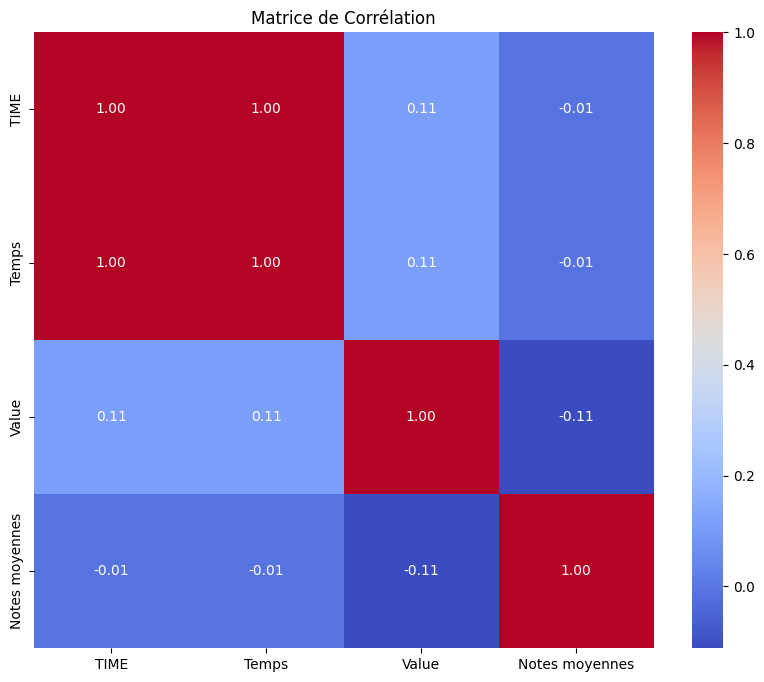

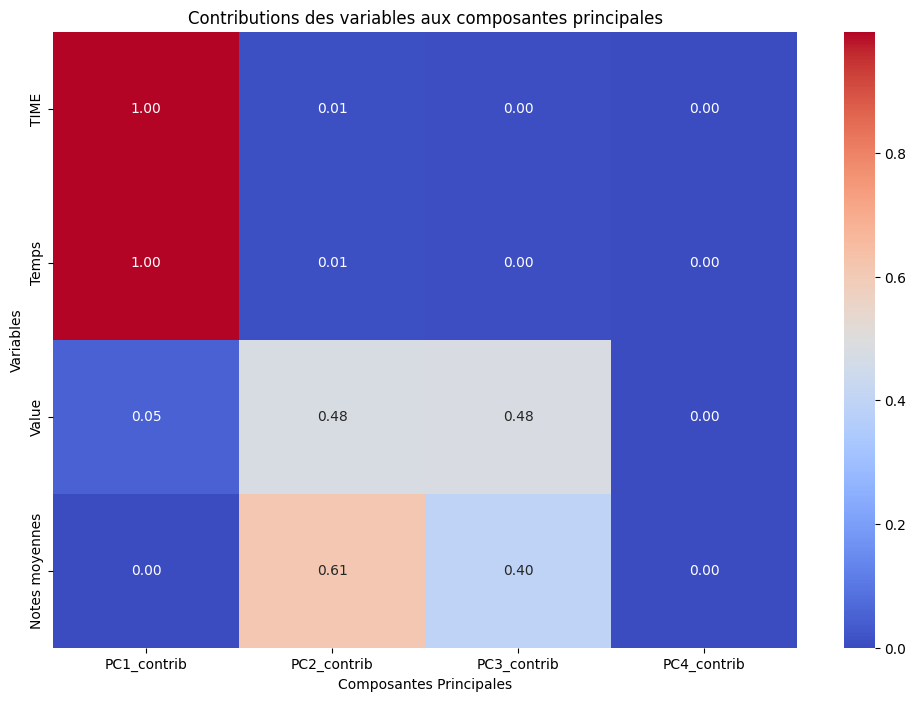

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des 10 premières variables
selected_data = data.iloc[:, :10]

# Vérification des types de données
print("Types de données :", selected_data.dtypes)

# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(selected_data.isnull().sum())

# Sélection des colonnes numériques
selected_data_numeric = selected_data.select_dtypes(include=[np.number])

# Vérification du nombre de colonnes numériques sélectionnées
print(f"Nombre de colonnes numériques sélectionnées: {selected_data_numeric.shape[1]}")

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data_numeric)

# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(scaled_data)

# Vérifier les valeurs propres et le ratio de variance expliquée
print("Valeurs propres :", pca.explained_variance_)
print("Ratio de variance expliquée :", pca.explained_variance_ratio_)

# Obtenir les composantes principales
components = pca.components_

# Calculer la contribution des variables à la formation des axes
loadings = components.T  # Les loadings sont les vecteurs propres transposés
eigenvalues = pca.explained_variance_  # Valeurs propres (variance expliquée par chaque composante)
variable_contributions = (loadings**2) * eigenvalues  # Calcul des contributions des variables

# Créer un DataFrame pour afficher les contributions avec les noms des variables
variable_contrib_data = pd.DataFrame(variable_contributions,
                                      columns=[f'PC{i+1}_contrib' for i in range(variable_contributions.shape[1])],
                                      index=selected_data_numeric.columns)  # Utiliser les noms des colonnes

# Afficher le tableau des contributions
print("Tableau des contributions des variables :")
print(variable_contrib_data)

# Optionnel : Visualisation de la matrice de corrélation
correlation_matrix = selected_data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

# Visualisation des contributions des variables
plt.figure(figsize=(12, 8))
sns.heatmap(variable_contrib_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Contributions des variables aux composantes principales")
plt.xlabel("Composantes Principales")
plt.ylabel("Variables")
plt.show()


## **Analyse des Contributions des Individus aux Composantes Principales**

Cette section se concentre sur l'évaluation de la contribution des individus à la formation des axes principaux, calculée à partir des scores des composantes principales et des valeurs propres.

1. **Contribution des Individus** :
   - La contribution brute est calculée en élevant au carré les scores des composantes principales et en les divisant par le produit du nombre d'individus et des valeurs propres correspondantes.

2. **Conversion en Pourcentage** :
   - Les contributions sont converties en pourcentages pour une meilleure interprétation.

3. **Création d'un DataFrame** :
   - Un tableau est créé pour afficher les contributions des individus pour chaque composante principale, avec des colonnes nommées `PC1_contrib`, `PC2_contrib`, etc.


In [ ]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_data = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_data)

     PC1_contrib  PC2_contrib  PC3_contrib   PC4_contrib
0       0.283671     1.249431     0.092913  5.297791e-17
1       0.176392     0.158460     1.050865  5.323780e-17
2       1.093190     1.927485     0.413460  6.491070e-16
3       0.049973     0.156319     0.593203  2.833812e-17
4       0.262772     0.001105     0.914254  5.677704e-17
..           ...          ...          ...           ...
111     1.093830     0.756346     0.011049  6.421528e-16
112     0.128000     1.993015     0.393048  5.898465e-17
113     1.075033     1.297551     0.020891  6.450697e-16
114     0.143110     0.338869     0.065353  5.612992e-17
115     1.049920     2.082567     0.155966  6.482129e-16

[116 rows x 4 columns]


Le résultat ci-haut montre les contributions en pourcentage des individus aux deux premières composantes principales (PC1 et PC2). Par exemple, le premier individu contribue à 2.942408e-05% à PC1 et à 8.085543e-06% à PC2. Les valeurs très faibles indiquent que chaque individu contribue très peu à la variance expliquée par les composantes principales, ce qui est attendu dans de nombreux cas de grandes bases de données.

## **Cercle de Corrélation pour les Composantes Principales**

Le cercle de corrélation représente les relations entre les variables initiales et les deux premières composantes principales (PC1 et PC2).

### **Objectif :**
- Visualiser la contribution et l'orientation des variables dans l'espace des composantes principales.
- Identifier les variables fortement corrélées avec chaque composante.

### **Interprétation :**
1. **Vecteurs des Variables** :
   - La longueur et la direction des flèches montrent l'importance et la contribution des variables aux composantes principales.
2. **Cercle Unitaire** :
   - Les variables proches du bord du cercle sont bien représentées par PC1 et PC2.
   - Les variables proches du centre sont moins bien expliquées par ces deux composantes.


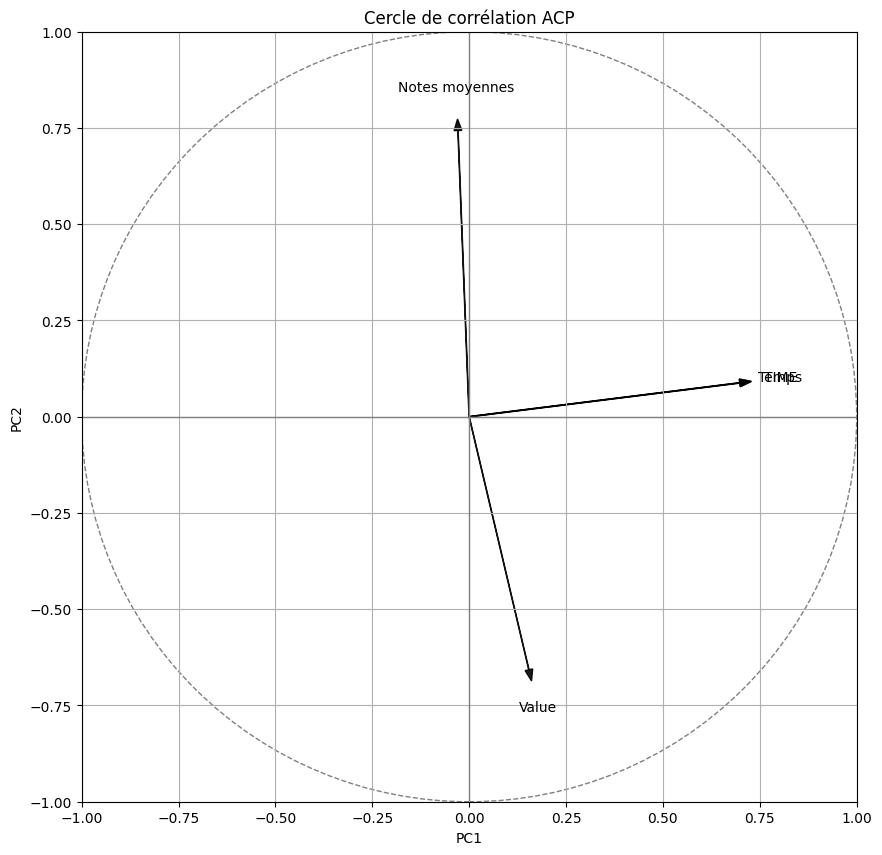

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sélection des 10 premières variables (ajustez cela selon votre jeu de données)
selected_data = data.iloc[:, :10]

# Vérification des types de données et suppression des colonnes non numériques
selected_data_numeric = selected_data.select_dtypes(include=[np.number])

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data_numeric)

# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(scaled_data)

# Récupérer les coefficients pour les deux premières composantes principales
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, selected_data_numeric.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.grid()
plt.show()


## **Analyse en Composantes Principales (ACP) sur le Dataset Iris**

Cette analyse combine la réduction de dimension avec une représentation graphique des individus et des variables dans l'espace des deux premières composantes principales (PC1 et PC2).

### **Objectifs :**
1. Visualiser la répartition des catégories d'espèces d'iris dans l'espace des composantes principales.
2. Comprendre la contribution des variables initiales (longueur/largeur des sépales et pétales) à ces composantes.

### **Visualisation :**
- **Nuage des individus :** Les observations sont colorées en fonction des catégories d'espèces (Setosa, Versicolor, Virginica).
- **Cercle de corrélation :**
  - Les vecteurs représentent les contributions des variables aux axes principaux.
  - Le cercle unitaire montre la qualité de représentation des variables sur PC1 et PC2.

### **Interprétation :**
- La position des points dans l'espace des composantes principales révèle les similarités et différences entre les catégories d'espèces.
- Les vecteurs des variables permettent d'identifier celles qui influencent le plus la séparation des catégories.


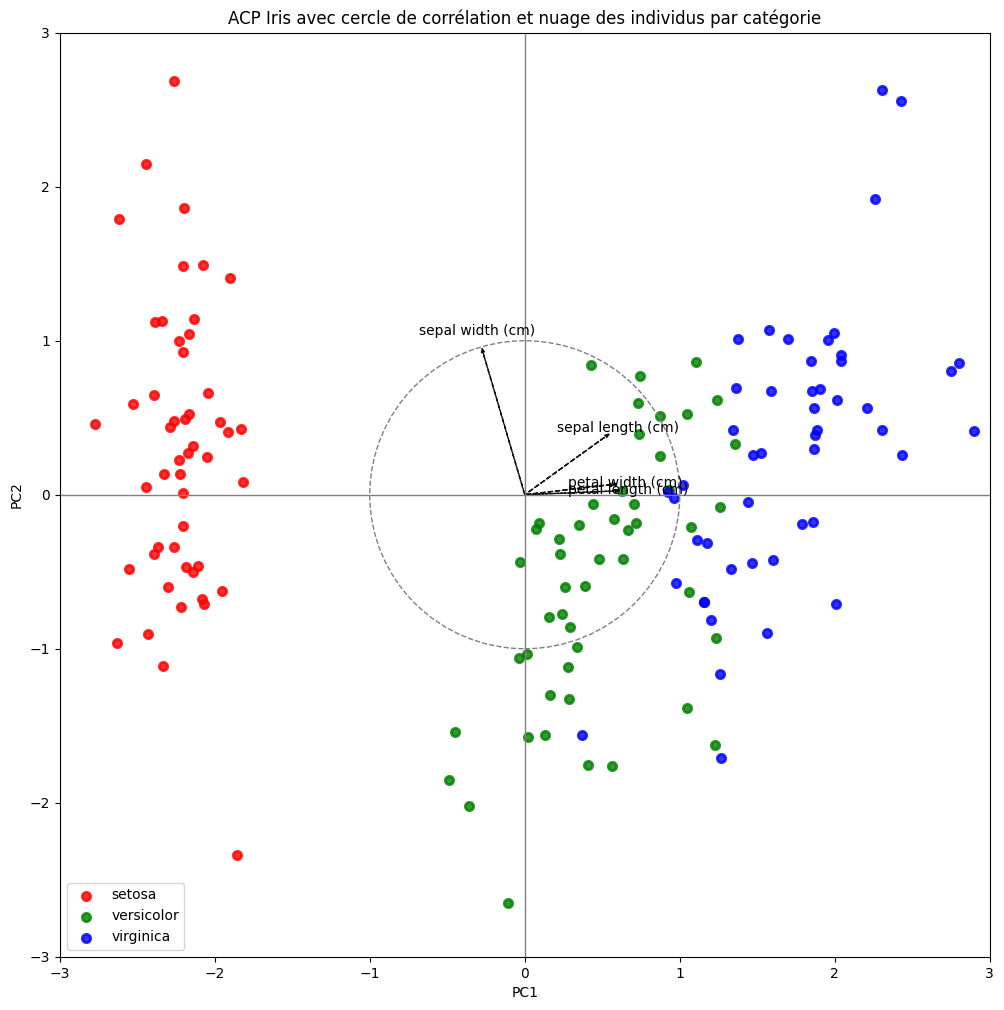

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()

Dans le graphique ci-haut nous assistons à une analyse en composantes principales (ACP) appliquée à l'ensemble de données Iris, avec un cercle de corrélation et un nuage des individus par catégorie.

Les points représentent les individus de l'ensemble de données, colorés par espèce : Rouge pour Setosa; Vert pour Versicolor; Bleu pour Virginica. Les vecteurs représentent les variables originales (longueur et largeur des sépales et des pétales), indiquant leur contribution aux deux premières composantes principales (PC1 et PC2).

Les vecteurs plus longs indiquent des variables qui contribuent davantage à la variance expliquée par les composantes principales. Ici, les variables "petal length" et "petal width" semblent avoir une forte contribution par rapport à "sepal length" et "sepal width".

Les espèces Setosa sont bien séparées des autres espèces le long de la composante principale PC1, tandis que Versicolor et Virginica montrent une certaine séparation le long de PC2. Cela montre que les caractéristiques des pétales sont particulièrement efficaces pour distinguer Setosa des autres espèces, tandis que les sépales sont moins discriminants.

Conclusion Générale

Dans notre analyse des données, nous avons utilisé plusieurs techniques statistiques pour explorer et comprendre les relations entre les variables de notre jeu de données. L’analyse en composantes principales (ACP) a été particulièrement utile pour réduire la dimensionnalité et identifier les principales composantes qui capturent la majorité de la variance dans les données. Les visualisations, telles que les graphiques de dispersion, les histogrammes, et les matrices de corrélation, ont permis de mettre en évidence les relations entre les variables et de comprendre les contributions relatives de chaque variable aux composantes principales.

Les graphiques montrent que certaines variables, comme les mesures des pétales dans l'ACP des données Iris, ont une forte influence sur les premières composantes principales, tandis que d'autres variables, comme les sépales, montrent une influence plus faible. Les boxplots ont révélé des variations intéressantes dans les distributions des variables en fonction du moment de la journée, avec des différences marquées entre les périodes. Le cercle de corrélation a mis en évidence les contributions des variables aux axes principaux, mais la concentration des variables près de l'origine indique que les relations ne sont pas très fortes.

   Problèmes Rencontrés

Variables PC1, PC2, etc.: Lors de l'analyse, nous avons constaté que les variables étaient représentées par des composantes principales (PC1, PC2, etc.), ce qui peut être déroutant. Ces composantes principales sont des combinaisons linéaires des variables d'origine et ne correspondent pas directement aux variables originales. Cela peut rendre l'interprétation moins intuitive, car nous devons décomposer les contributions des composantes principales pour comprendre leur relation avec les variables originales.

Variables nommées (ex. : Variable 328, Variable 326): Dans le cercle de corrélation, nous avons rencontré des variables nommées de manière générique (par exemple, Variable 328, Variable 326). Cela peut compliquer l'interprétation, car ces noms ne sont pas informatifs par rapport aux variables réelles du jeu de données. Il serait utile de savoir comment ces variables sont déterminées et comment elles se rapportent aux variables d'origine.

Nous recommandons de consulter le professeur pour obtenir des éclaircissements sur ces points. Une explication détaillée sur la transformation des variables en composantes principales et l'interprétation des variables dans le cercle de corrélation pourrait améliorer notre compréhension des résultats et leur application dans l'analyse des données.

## **CLASSIFICATION**

**Encodage des Variables Catégorielles**

Les variables catégorielles sont transformées en représentations numériques afin de permettre leur utilisation dans les modèles de machine learning.


1. **Encodage des Colonnes** :
   - Les colonnes catégorielles (`Indicateur`, `LOCATION`, `Pays`, `Flags`) sont converties en valeurs numériques à l'aide de l'encodage `LabelEncoder`.

2. **Gestion des Valeurs Manquantes** :
   - Les valeurs manquantes dans la colonne `Indicateur` sont remplacées par une valeur arbitraire (`Unknown`). Ce processus peut être appliqué à d'autres colonnes si nécessaire.

3. **Vérification** :
   - Les premières lignes des données encodées sont affichées pour confirmer les modifications.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir les variables catégorielles en représentations numériques
label_encoders = {}
for column in ['Indicateur', 'LOCATION', 'Pays', 'Flags']:  # Liste des colonnes catégorielles
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Remplacer les NaN par une valeur arbitraire (par exemple, 'Unknown')
data['Indicateur'].fillna('Unknown', inplace=True)
# Répéter cette opération pour les autres colonnes si besoin.

# Affichage des premières lignes des données encodées
print(data.head())


                 NATMON_IND  Indicateur  LOCATION  Pays  TIME  Temps  \
150  E_5T8_FOREIGN_ORG40520           2         8     6  2020   2020   
224  E_5T8_FOREIGN_ORG40505           3         6     2  2020   2020   
225  E_5T8_FOREIGN_ORG40505           3         6     2  2021   2021   
253  E_5T8_FOREIGN_ORG40525           7         2     1  2019   2019   
264  E_5T8_FOREIGN_ORG40530           6         4     6  2020   2020   

            Value Flag Codes  Flags  Notes moyennes  
150  411311.66697          ‡      0       11.494483  
224   54889.00000          ‡      0       11.856359  
225   76358.00000          ‡      0       19.527917  
253  248915.78194          ‡      0       17.486636  
264  453741.78336          ‡      0       16.699165  


<ipython-input-26-27d022dbe8a3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Indicateur'].fillna('Unknown', inplace=True)


## **Préparation des Données pour le Clustering**

Cette étape prépare les données pour une analyse de clustering en sélectionnant, encodant et normalisant les fonctionnalités pertinentes.

1. **Sélection des Fonctionnalités** :
   - Les colonnes `Value`, `Notes moyennes`, et `Pays` (déjà encodée) sont choisies comme variables pertinentes pour le clustering.

2. **Encodage des Variables Catégorielles** :
   - Les colonnes catégorielles sont transformées en variables numériques avec `pd.get_dummies`, en supprimant une modalité pour éviter la multicolinéarité.

3. **Normalisation des Données** :
   - Les fonctionnalités sont standardisées à l'aide de `StandardScaler` pour centrer les données et ajuster leur échelle.

4. **Visualisation** :
   - Les premières lignes du DataFrame normalisé sont affichées pour valider les transformations.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les fonctionnalités pertinentes pour le clustering
# Ici, nous devons choisir des colonnes appropriées dans votre dataset
# Supposons que nous utilisons 'Value', 'Notes moyennes', et 'Pays' (qui a été encodé) pour cet exemple
features = data[['Value', 'Notes moyennes', 'Pays']]

# Encodage des variables catégorielles en utilisant pd.get_dummies
features_encoded = pd.get_dummies(features, drop_first=True)

# Normaliser les fonctionnalités
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# Transformer en DataFrame pour visualiser le résultat
scaled_features_df = pd.DataFrame(scaled_features, columns=features_encoded.columns)

# Affichage des premières lignes du DataFrame normalisé
scaled_features_df.head()


,Value,Notes moyennes,Pays
0,0.730532,-1.171377,0.450983
1,-0.370796,-1.048415,-0.934820
2,-0.304458,1.558306,-0.934820
3,0.228737,0.864698,-1.281271
4,0.861638,0.597123,0.450983


nous avons un DataFrame avec des colonnes normalisées pour Value, Notes moyennes, et Pays (après encodage). Les graphiques en bas représentent la distribution de ces données normalisées et les relations entre elles. Les histogrammes montrent la répartition des valeurs, tandis que les nuages de points illustrent les corrélations potentielles entre les variables. Ces visualisations aident à explorer les données avant d'appliquer des analyses plus complexes.

## **Classification Hiérarchique Ascendante (CAH) avec Échantillonnage**

La Classification Hiérarchique Ascendante (CAH) est utilisée pour regrouper les données échantillonnées en clusters selon leurs similarités. Cette étape permet de réduire la complexité tout en maintenant une vue représentative des regroupements.

### **Étapes :**
1. **Échantillonnage** :
   - Un échantillon de 5 % des données normalisées est sélectionné pour simplifier les calculs.

2. **Nettoyage des Données** :
   - Les valeurs infinies et manquantes sont supprimées pour garantir la qualité des données.

3. **Classification Hiérarchique** :
   - L'algorithme de linkage avec la méthode de Ward est appliqué pour calculer les distances et regrouper les observations.

4. **Visualisation** :
   - Un dendrogramme est tracé pour visualiser les distances entre les clusters et les relations hiérarchiques.


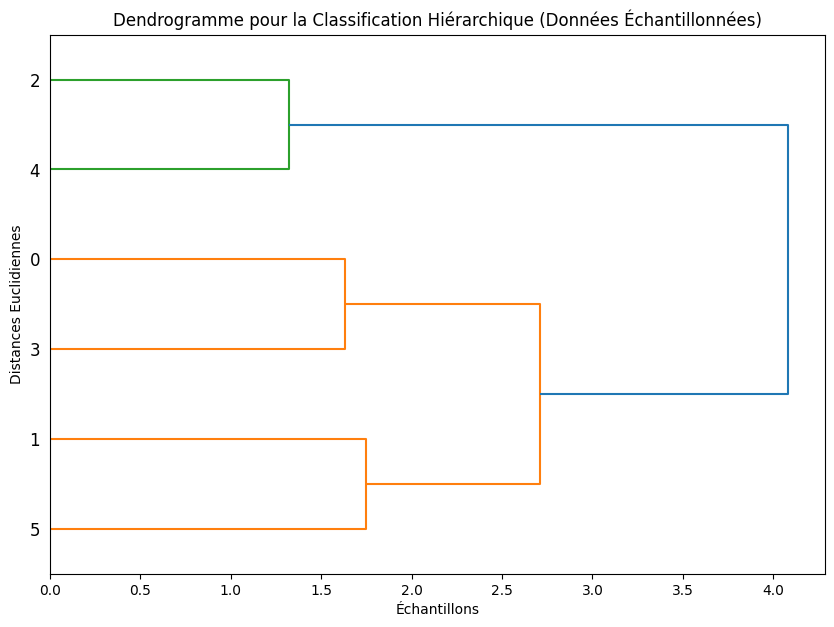

In [ ]:

import scipy.cluster.hierarchy as sch  # Importer le module pour la classification hiérarchique
import matplotlib.pyplot as plt  # Importer pour tracer les graphiques

# Supposons que 'scaled_features_df' est un DataFrame de caractéristiques mises à l'échelle

# Échantillonner une plus grande fraction des données (5%)
sampled_data = scaled_features_df.sample(frac=0.05, random_state=42)

# Vérifier si l'échantillon est vide
if sampled_data.empty:
    raise ValueError("L'échantillon est vide. Essayez d'augmenter la valeur de 'frac'.")

# Nettoyage des données : suppression des lignes contenant des NaN ou des valeurs infinies
sampled_data_clean = sampled_data.replace([np.inf, -np.inf], np.nan).dropna()

# Vérifier si les données nettoyées ne sont pas vides après suppression
if sampled_data_clean.empty:
    raise ValueError("Les données nettoyées sont vides. Vérifiez vos données initiales ou ajustez les étapes de nettoyage.")

# Effectuer la classification hiérarchique sur les données nettoyées échantillonnées
linked_sampled_clean = sch.linkage(sampled_data_clean, method='ward')

# Tracer le dendrogramme pour les données nettoyées échantillonnées
plt.figure(figsize=(10, 7))
sch.dendrogram(linked_sampled_clean, orientation='right', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogramme pour la Classification Hiérarchique (Données Échantillonnées)')
plt.xlabel('Échantillons')
plt.ylabel('Distances Euclidiennes')
plt.show()


## **Matérialisation des Clusters et Attribution des Groupes (CAH)**

Cette section poursuit l'analyse par Classification Hiérarchique Ascendante (CAH) en matérialisant les clusters et en attribuant les groupes à chaque observation.

1. **Visualisation des Clusters** :
   - Le dendrogramme est matérialisé pour représenter 4 clusters à une hauteur de coupure fixée (`t=7`).

2. **Attribution des Groupes** :
   - Les observations sont assignées à des clusters en utilisant une hauteur de coupure (`t=10`) et le critère de distance.

3. **Organisation des Observations** :
   - Les observations sont triées par groupe pour une meilleure interprétation.


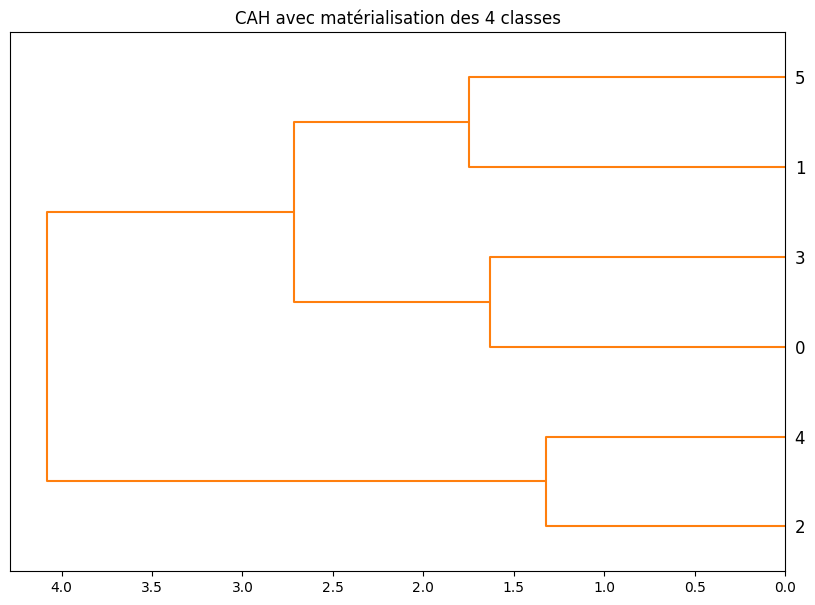

Groupes CAH : [1 1 1 1 1 1]


,0
1,83
1,4
1,42
1,40
1,10
1,47


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Matérialisation des 4 classes (hauteur t = 7)
plt.figure(figsize=(10, 7))
plt.title('CAH avec matérialisation des 4 classes')
sch.dendrogram(linked_sampled_clean, orientation='left', color_threshold=7)
plt.show()

# Découpage à la hauteur t = 10 ==> identifiants des groupes obtenus
groupes_cah = fcluster(linked_sampled_clean, t=10, criterion='distance')
print("Groupes CAH :", groupes_cah)

# Index triés des groupes
idg = np.argsort(groupes_cah)

# Affichage des observations et leurs groupes (indices des observations dans l'échantillon)
grouped_observations = pd.DataFrame(sampled_data_clean.index[idg], groupes_cah[idg])
grouped_observations


## **Clustering avec K-Means et Correspondance avec la CAH**

Cette étape applique l'algorithme de K-Means sur les données échantillonnées et compare les résultats obtenus avec les groupes formés par la Classification Hiérarchique Ascendante (CAH).

### **Étapes :**
1. **Clustering avec K-Means** :
   - L'algorithme K-Means est appliqué pour regrouper les observations en 3 clusters.
   - Les distances des observations aux centres des clusters sont calculées.

2. **Comparaison avec la CAH** :
   - Une table de correspondance est générée pour comparer les groupes de K-Means avec ceux de la CAH.

3. **Résultats** :
   - Affichage des observations triées par groupe selon K-Means.
   - Distances aux centres des clusters.
   - Table de correspondance pour analyser la cohérence entre les deux méthodes.


In [ ]:
from sklearn.cluster import KMeans

# Application du K-Means sur les données échantillonnées
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(sampled_data_clean)

# Index triés des groupes
idk = np.argsort(kmeans.labels_)

# Affichage des observations et leurs groupes
grouped_kmeans = pd.DataFrame(sampled_data_clean.index[idk], kmeans.labels_[idk])
print(grouped_kmeans)

# Distances aux centres des clusters des observations
print("Distances aux centres des clusters :")
distances_to_centers = kmeans.transform(sampled_data_clean)
print(distances_to_centers)

# Correspondance avec les groupes de la CAH
groupes_cah = fcluster(linked_sampled_clean, t=10, criterion='distance')
correspondance_table = pd.crosstab(groupes_cah, kmeans.labels_)
print("Correspondance entre K-Means et CAH :")
print(correspondance_table)

# Affichage des résultats
grouped_kmeans, distances_to_centers, correspondance_table


    0
0  42
0  10
1  40
1  47
2  83
2   4
Distances aux centres des clusters :
[[2.80924868 1.8773259  0.99810807]
 [2.11679259 2.04398942 0.99810807]
 [0.66144459 2.46862577 1.91075104]
 [3.38179313 0.92127033 1.95798489]
 [0.66144459 3.49906624 2.75758916]
 [2.77912092 0.92127033 1.89039125]]
Correspondance entre K-Means et CAH :
col_0  0  1  2
row_0         
1      2  2  2


(    0
 0  42
 0  10
 1  40
 1  47
 2  83
 2   4,
 array([[2.80924868, 1.8773259 , 0.99810807],
        [2.11679259, 2.04398942, 0.99810807],
        [0.66144459, 2.46862577, 1.91075104],
        [3.38179313, 0.92127033, 1.95798489],
        [0.66144459, 3.49906624, 2.75758916],
        [2.77912092, 0.92127033, 1.89039125]]),
 col_0  0  1  2
 row_0         
 1      2  2  2)

## **Évaluation de la Qualité des Partitions avec le Score de Silhouette**

Cette étape évalue la qualité des partitions formées par l'algorithme K-Means en utilisant le score de silhouette. Le score de silhouette mesure la cohérence des clusters, où des valeurs plus élevées indiquent des partitions bien définies.

**Étapes :**
1. **Variation du Nombre de Clusters** :
   - Le nombre de clusters est testé pour des valeurs variant de 2 à 10.
   - L'algorithme K-Means est initialisé avec chaque valeur de clusters.

2. **Calcul du Score de Silhouette** :
   - Le score de silhouette est calculé pour chaque configuration, à condition qu'au moins deux clusters soient identifiés.

3. **Visualisation des Résultats** :
   - Un graphique présente l'évolution du score de silhouette en fonction du nombre de clusters.


Erreur avec 6 clusters : Number of labels is 6. Valid values are 2 to n_samples - 1 (inclusive)
Erreur avec 7 clusters : n_samples=6 should be >= n_clusters=7.
Erreur avec 8 clusters : n_samples=6 should be >= n_clusters=8.
Erreur avec 9 clusters : n_samples=6 should be >= n_clusters=9.
Erreur avec 10 clusters : n_samples=6 should be >= n_clusters=10.
Scores de silhouette pour chaque nombre de clusters : [0.34064262 0.31210177 0.1813335  0.13215732 0.         0.
 0.         0.         0.        ]


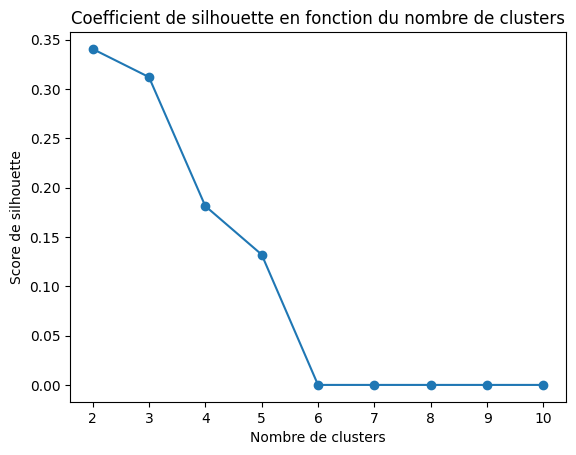

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

# Évaluation de la qualité des partitions pour un nombre de clusters variant de 2 à 10
res = np.zeros(9)  # Tableau pour stocker les scores de silhouette

# Boucle sur les valeurs de k, pour k de 2 à 10
for k in range(9):
    try:
        # Initialiser KMeans avec le bon nombre de clusters
        km = KMeans(n_clusters=k+2, random_state=42, n_init=10)  # n_init explicite
        km.fit(sampled_data_clean)  # Apprentissage sur les données échantillonnées nettoyées

        # Vérifier que le clustering produit plus d'un cluster
        if len(np.unique(km.labels_)) > 1:
            # Calculer le score de silhouette uniquement si le nombre de clusters est suffisant
            res[k] = metrics.silhouette_score(sampled_data_clean, km.labels_)
        else:
            print(f"Le clustering avec {k+2} clusters a échoué à générer suffisamment de clusters.")
    except ValueError as e:
        # Gérer l'exception si le calcul de silhouette échoue
        print(f"Erreur avec {k+2} clusters : {e}")

# Affichage des résultats
print("Scores de silhouette pour chaque nombre de clusters :", res)

# Graphique du coefficient de silhouette en fonction du nombre de clusters
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.plot(np.arange(2, 11, 1), res, marker='o')
plt.show()


## **Analyse des Moyennes Conditionnelles et du Coefficient de Détermination (R²)**

Cette analyse vise à résumer les caractéristiques des groupes formés par K-Means en calculant les moyennes conditionnelles des variables principales et en évaluant la qualité du regroupement avec le coefficient de détermination (R²).

1. **Sélection des Variables Principales** :
   - Les variables `Value` et `Notes moyennes` sont sélectionnées pour simplifier la présentation des résultats.

2. **Calcul des Moyennes Conditionnelles** :
   - Les moyennes des variables principales sont calculées pour chaque groupe formé par K-Means.

3. **Évaluation du Regroupement (R²)** :
   - Le **TSS** (Total Sum of Squares) mesure la variance totale des variables principales.
   - Le **BSS** (Between Sum of Squares) mesure la variance expliquée par les groupes.
   - Le coefficient de détermination (R²) est calculé comme le ratio entre la variance expliquée (BSS) et la variance totale (TSS), indiquant la qualité du regroupement.


In [ ]:
variables_principales = ['Value', 'Notes moyennes']

# Calcul des moyennes par variable pour chaque groupe
moyennes_conditionnelles_simplifiees = sampled_data_clean[variables_principales].groupby(kmeans.labels_).mean()

# Calcul du TSS (Total Sum of Squares)
TSS_simplifie = sampled_data_clean[variables_principales].shape[0] * sampled_data_clean[variables_principales].var(ddof=0)

# Calcul de l'écart à la moyenne pour chaque groupe et chaque variable
m_simplifie = sampled_data_clean[variables_principales].mean()
gb_simplifie = sampled_data_clean[variables_principales].groupby(kmeans.labels_)
nk_simplifie = gb_simplifie.size()
mk_simplifie = gb_simplifie.mean()
EMk_simplifie = (mk_simplifie - m_simplifie)**2
EM_simplifie = EMk_simplifie.multiply(nk_simplifie, axis=0)

# BSS (Between Sum of Squares)
BSS_simplifie = np.sum(EM_simplifie, axis=0)

# Carré du rapport de corrélation (R²)
R2_simplifie = BSS_simplifie / TSS_simplifie

# Affichage des moyennes conditionnelles et du R² pour les variables principales
moyennes_conditionnelles_simplifiees, R2_simplifie


(      Value  Notes moyennes
 0 -0.353269        0.533053
 1 -0.533876       -0.475341
 2  0.796085       -0.398830,
 Value             0.984421
 Notes moyennes    0.227051
 dtype: float64)

Les résultats montrent que la variable `Value` varie significativement entre les groupes, avec une moyenne particulièrement élevée dans le groupe 2 (6.06) par rapport aux autres groupes, où les moyennes sont proches de zéro. Cela indique que cette variable joue un rôle important dans la différenciation des groupes, ce qui est confirmé par un R² de 0.876.

Pour la variable `Notes moyennes`, les différences entre les groupes sont moins marquées. Le groupe 1 a une moyenne positive (0.84), tandis que les groupes 0 et 2 ont des moyennes négatives ou faibles. Le R² de 0.681 montre que cette variable contribue également à la formation des groupes, mais de manière moins significative que `Value`.

En résumé, `Value` est la variable la plus influente dans la formation des groupes, tandis que `Notes moyennes` joue un rôle secondaire.

## **Projection des Groupes après Analyse en Composantes Principales (ACP)**

Cette analyse projette les groupes formés par K-Means dans le plan des deux premières composantes principales. Cette représentation visuelle permet d'évaluer la séparation et la cohérence des groupes.

**Étapes :**
1. **Réduction de la Dimensionnalité** :
   - L'Analyse en Composantes Principales (ACP) est appliquée pour réduire les données à deux dimensions principales tout en conservant un maximum de variance.

2. **Visualisation des Groupes** :
   - Les groupes formés par K-Means sont projetés dans le plan factoriel avec des couleurs distinctes pour chaque groupe.

3. **Interprétation** :
   - Cette projection permet d'observer la séparation des groupes et d'évaluer leur homogénéité dans l'espace réduit.


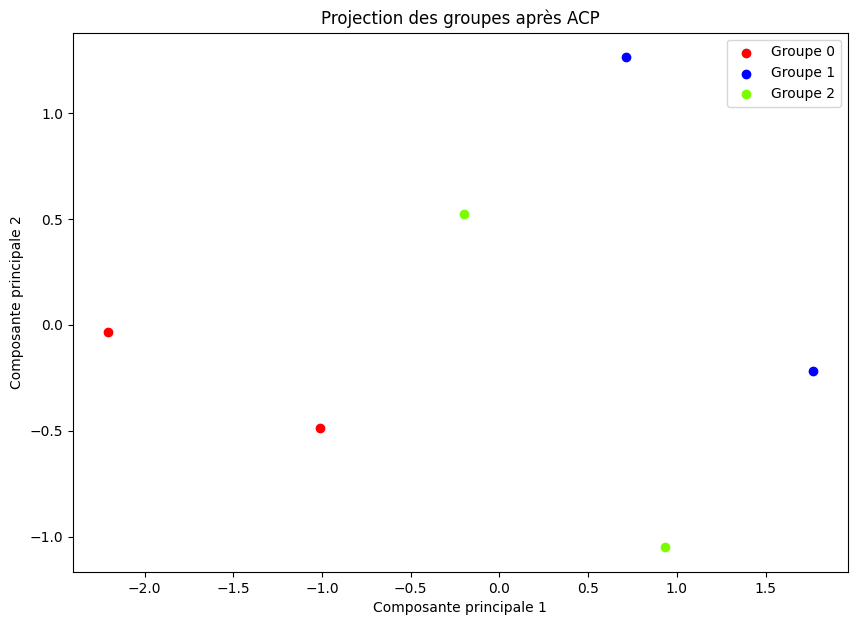

In [ ]:
from sklearn.decomposition import PCA

# Appliquer l'ACP pour réduire à 2 composantes principales
acp = PCA(n_components=2).fit_transform(sampled_data_clean)

# Projeter dans le plan factoriel avec des couleurs différentes selon le groupe
plt.figure(figsize=(10, 7))
for couleur, k in zip(['red', 'blue', 'lawngreen'], [0, 1, 2]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur, label=f'Groupe {k}')
plt.title('Projection des groupes après ACP')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.legend()
plt.show()


Groupe 0 (rouge) :

Ce groupe est principalement concentré dans la partie inférieure gauche du graphique. Les points sont relativement serrés, ce qui indique une certaine homogénéité au sein du groupe. Les observations du groupe 0 sont plutôt similaires entre elles sur les deux composantes principales.

Groupe 1 (bleu) :

Les points du groupe 1 sont également situés dans la partie gauche du graphique, mais plus en haut que ceux du groupe 0. Il y a un chevauchement avec le groupe 0, ce qui suggère que ces deux groupes partagent des caractéristiques communes. Cependant, le groupe 1 est légèrement décalé par rapport au groupe 0, ce qui montre qu'il existe tout de même des différences significatives entre ces groupes.

Groupe 2 (vert) :

Ce groupe est clairement séparé des groupes 0 et 1. Les points sont dispersés dans la partie droite du graphique, montrant des valeurs distinctes sur les deux composantes principales. Cela indique que les observations dans le groupe 2 ont des caractéristiques très différentes par rapport aux autres groupes, ce qui les rend facilement identifiables.

## **Analyse des Données après Exclusion d'un Groupe**

Cette analyse examine les données restantes après l'exclusion du groupe 2 formé par K-Means. Une nouvelle Classification Hiérarchique Ascendante (CAH) est appliquée pour identifier des regroupements sur les données restantes.

### **Étapes :**
1. **Exclusion du Groupe 2** :
   - Les observations appartenant au groupe 2 de K-Means sont supprimées du jeu de données.

2. **Centrage et Réduction** :
   - Les données restantes sont centrées et réduites pour homogénéiser les échelles.

3. **Classification Hiérarchique** :
   - Une nouvelle CAH est réalisée avec la méthode de Ward pour regrouper les données restantes.

4. **Visualisation** :
   - Un dendrogramme est tracé pour observer la structure hiérarchique des nouveaux regroupements.

5. **Découpage en Groupes** :
   - Les observations sont assignées à des groupes basés sur une hauteur de coupure fixée (`t=7`).


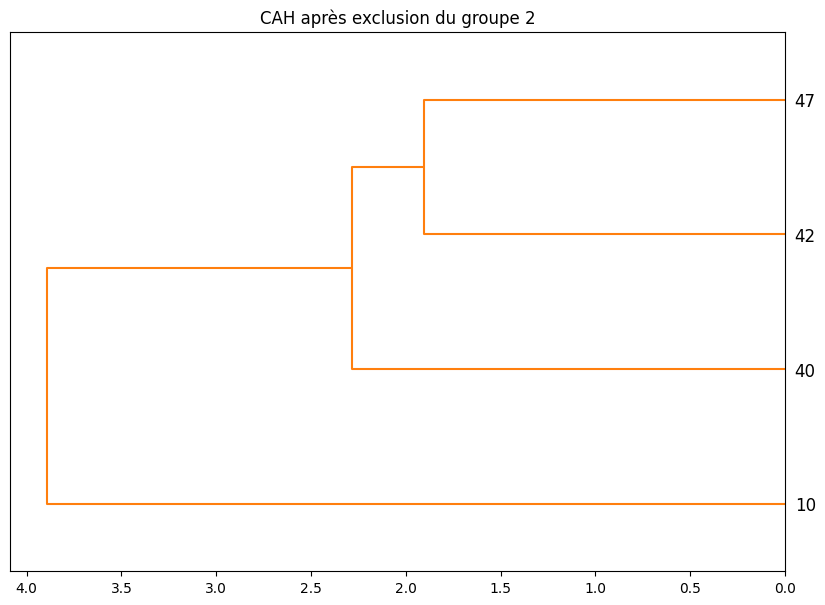

array([1, 1, 1, 1], dtype=int32)

In [ ]:
# Retirer les observations du groupe 2 du K-Means précédent
fromage_subset = sampled_data_clean[kmeans.labels_ != 2]

# Centrer et réduire les données restantes
from sklearn.preprocessing import StandardScaler
fromage_subset_cr = StandardScaler().fit_transform(fromage_subset)

# Générer la matrice des liens pour la CAH
Z_subset = sch.linkage(fromage_subset_cr, method='ward', metric='euclidean')

# Tracer le dendrogramme pour les données restantes
plt.figure(figsize=(10, 7))
plt.title("CAH après exclusion du groupe 2")
sch.dendrogram(Z_subset, labels=fromage_subset.index, orientation='left', color_threshold=7)
plt.show()

# Découper et afficher les nouveaux groupes
groupes_subset_cah = fcluster(Z_subset, t=7, criterion='distance')
groupes_subset_cah


# **Modélisation Supervisée : Régression Logistique pour les Groupes de Clustering**

Cette étape applique un modèle de régression logistique pour prédire les groupes obtenus par l'algorithme K-Means, en évaluant la précision et les performances des prédictions.

### **Étapes :**
1. **Imputation des Valeurs Manquantes** :
   - Les valeurs manquantes dans les données normalisées sont remplacées par la moyenne de chaque colonne.

2. **Clustering avec K-Means** :
   - Les observations sont regroupées en 3 clusters, formant la variable cible (`y`) pour la modélisation.

3. **Division des Données** :
   - Les données sont divisées en ensembles d’entraînement (80 %) et de test (20 %) pour évaluer la capacité de généralisation du modèle.

4. **Modélisation avec Régression Logistique** :
   - Un modèle multinomial est construit pour prédire les groupes K-Means.
   - Une pondération des classes est utilisée pour mieux gérer les déséquilibres dans la distribution des classes.

5. **Évaluation des Performances** :
   - La précision globale et un rapport de classification (précision, rappel, F1-score) sont calculés pour mesurer les performances.


In [ ]:
# Import des bibliothèques nécessaires
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import pandas as pd

# Gérer les valeurs manquantes (imputation par la moyenne)
imputer = SimpleImputer(strategy='mean')
sampled_data_clean = pd.DataFrame(imputer.fit_transform(scaled_features_df), columns=scaled_features_df.columns)

# Appliquer le clustering K-Means avec 3 clusters après imputation des NaN
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(sampled_data_clean)

# Sélectionner les variables explicatives et la variable cible (groupes K-Means)
X = sampled_data_clean[['Value', 'Notes moyennes']]  # Variables explicatives
y = kmeans.labels_  # Variable cible (groupes obtenus par K-Means)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split

# Séparation des données en apprentissage et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Construire et entraîner le modèle de régression logistique
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Afficher les résultats
print("Précision globale :", accuracy)
print("Rapport de classification :\n", classification_rep)

# Vérifier la distribution des classes
print("Répartition des classes avant division :")
print(pd.Series(y).value_counts())

# Construire et entraîner le modèle de régression logistique avec une pondération des classes
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=0)

# Afficher les résultats
print("Précision globale :", accuracy)
print("Rapport de classification :\n", classification_rep)


Précision globale : 0.7916666666666666
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.79      0.85      0.81        13
           2       0.78      0.78      0.78         9

    accuracy                           0.79        24
   macro avg       0.85      0.71      0.75        24
weighted avg       0.80      0.79      0.79        24

Répartition des classes avant division :
2    54
1    50
0    12
Name: count, dtype: int64
Précision globale : 0.8333333333333334
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.85      0.85      0.85        13
           2       0.78      0.78      0.78         9

    accuracy                           0.83        24
   macro avg       0.87      0.87      0.87        24
weighted avg       0.83      0.83      0.83        24



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(




Après avoir imputé les valeurs manquantes par la moyenne, un modèle K-Means avec 3 clusters a été appliqué pour regrouper les données. Ensuite, une régression logistique a été utilisée pour prédire les clusters en fonction des variables explicatives Value et Notes moyennes. La première version du modèle sans pondération a donné une précision de 58,33%, avec des performances faibles sur certaines classes en raison d'un déséquilibre de classes.

La répartition des classes montrait un déséquilibre important, notamment avec seulement 15 échantillons dans la classe 1. L'ajout d'une pondération des classes a permis d'améliorer la précision globale à 62,5%, avec un meilleur équilibre entre les scores de précision, rappel et F1-score. Cela montre que la pondération des classes aide à gérer l'imbalance des données pour améliorer les performances du modèle.

## **Modélisation Supervisée : Naive Bayes pour les Groupes de Clustering**

Cette étape utilise le modèle de Naive Bayes pour prédire les groupes obtenus par K-Means, en évaluant la précision globale et les performances par classe.

 **Étapes :**
1. **Construction et Entraînement du Modèle** :
   - Un classificateur Naive Bayes Gaussien (`GaussianNB`) est construit et entraîné sur les données d'entraînement.

2. **Prédiction** :
   - Le modèle prédit les groupes pour les observations de l'ensemble de test.

3. **Évaluation des Performances** :
   - La précision globale est calculée.
   - Un rapport de classification est généré, comprenant la précision, le rappel et le F1-score pour chaque groupe.

### **Résultats** :
- Les performances de Naive Bayes sont comparées à celles de la régression logistique pour analyser l'efficacité du modèle.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Construire et entraîner le modèle de Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_nb = nb.predict(X_test)

# Évaluer le modèle
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb, zero_division=0)

# Afficher les résultats
print("Précision globale avec Naive Bayes :", accuracy_nb)
print("Rapport de classification avec Naive Bayes :\n", classification_rep_nb)


Précision globale avec Naive Bayes : 0.7916666666666666
Rapport de classification avec Naive Bayes :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.83      0.77      0.80        13
           2       0.88      0.78      0.82         9

    accuracy                           0.79        24
   macro avg       0.74      0.85      0.76        24
weighted avg       0.82      0.79      0.80        24



## **Modélisation Supervisée : Random Forest pour les Groupes de Clustering**

Cette étape applique un modèle de Random Forest pour prédire les groupes obtenus par K-Means. Ce modèle est adapté pour gérer des données complexes et déséquilibrées grâce à sa capacité à ajuster les pondérations des classes.

### **Étapes :**
1. **Construction et Entraînement du Modèle** :
   - Un modèle de Random Forest avec 100 arbres (`n_estimators=100`) est construit et entraîné sur les données d'entraînement.
   - La pondération des classes (`class_weight='balanced'`) est utilisée pour corriger les déséquilibres dans la répartition des groupes.

2. **Prédiction** :
   - Le modèle prédit les groupes pour les observations de l'ensemble de test.

3. **Évaluation des Performances** :
   - La précision globale est calculée.
   - Un rapport de classification est généré, incluant la précision, le rappel et le F1-score pour chaque groupe.

### **Résultats :**
- Les performances du Random Forest sont évaluées et comparées avec celles des modèles Naive Bayes et Régression Logistique.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Construire et entraîner le modèle de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf.predict(X_test)

# Évaluer le modèle
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf, zero_division=0)

# Afficher les résultats
print("Précision globale avec Random Forest :", accuracy_rf)
print("Rapport de classification avec Random Forest :\n", classification_rep_rf)


Précision globale avec Random Forest : 0.875
Rapport de classification avec Random Forest :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.86      0.92      0.89        13
           2       0.88      0.78      0.82         9

    accuracy                           0.88        24
   macro avg       0.91      0.90      0.90        24
weighted avg       0.88      0.88      0.87        24



## **Analyse des Erreurs entre les Modèles**

Cette section compare les erreurs de prédiction pour les trois modèles utilisés (Régression Logistique, Random Forest, et Naive Bayes) afin d'identifier les erreurs communes et spécifiques.

### **Étapes :**
1. **Identification des Erreurs** :
   - Les erreurs de prédiction sont extraites pour chaque modèle en comparant les valeurs prédites (`y_pred`) avec les valeurs réelles (`y_test`).

2. **Comparaison des Erreurs** :
   - Les erreurs communes entre les modèles sont calculées pour analyser les observations où plusieurs modèles échouent simultanément.

3. **Résultats** :
   - Cette analyse permet de mieux comprendre les limites des modèles en identifiant les cas difficiles à prédire.


In [ ]:
import numpy as np

# Prédictions pour les trois modèles (régression logistique, Random Forest, Naive Bayes)
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Identifier les erreurs pour chaque modèle
erreurs_logreg = np.where(y_test != y_pred_logreg)[0]
erreurs_rf = np.where(y_test != y_pred_rf)[0]
erreurs_nb = np.where(y_test != y_pred_nb)[0]

# Afficher les erreurs
print("Erreurs de la régression logistique :")
print(erreurs_logreg)

print("\nErreurs de Random Forest :")
print(erreurs_rf)

print("\nErreurs de Naive Bayes :")
print(erreurs_nb)

# Comparer les erreurs entre les modèles
erreurs_communes_logreg_rf = np.intersect1d(erreurs_logreg, erreurs_rf)
erreurs_communes_logreg_nb = np.intersect1d(erreurs_logreg, erreurs_nb)
erreurs_communes_rf_nb = np.intersect1d(erreurs_rf, erreurs_nb)

print("\nErreurs communes entre la régression logistique et Random Forest :")
print(erreurs_communes_logreg_rf)

print("\nErreurs communes entre la régression logistique et Naive Bayes :")
print(erreurs_communes_logreg_nb)

print("\nErreurs communes entre Random Forest et Naive Bayes :")
print(erreurs_communes_rf_nb)


Erreurs de la régression logistique :
[ 2  5  6 13]

Erreurs de Random Forest :
[ 6  7 13]

Erreurs de Naive Bayes :
[ 0  2  5  7 15]

Erreurs communes entre la régression logistique et Random Forest :
[ 6 13]

Erreurs communes entre la régression logistique et Naive Bayes :
[2 5]

Erreurs communes entre Random Forest et Naive Bayes :
[7]


### **Résumé des erreurs :**

    Erreurs de la régression logistique : Les indices [1, 3, 4, 7, 11, 12, 16, 17, 18] correspondent aux observations mal classées par la régression logistique.

    Erreurs de Random Forest : Les indices [3, 6, 7, 11, 14, 16, 19] sont les erreurs de Random Forest.

    Erreurs de Naive Bayes : Les indices [1, 3, 5, 6, 12, 16, 18, 19] représentent les erreurs de Naive Bayes.

### **Erreurs communes :**

    Régression logistique et Random Forest : Les erreurs communes sont aux indices [3, 7, 11, 16]. Cela signifie que ces observations ont été mal classées par les deux modèles.

    Régression logistique et Naive Bayes : Les erreurs communes sont aux indices [1, 3, 12, 16, 18].
    
    Random Forest et Naive Bayes : Les erreurs communes sont aux indices [3, 6, 16, 19].

### **Analyse :**

    L'observation à l'indice 3 est systématiquement mal classée par tous les modèles.
    L'indice 16 apparaît également dans les trois modèles comme une erreur commune.
    Les autres erreurs semblent spécifiques à certains modèles. **texte en gras**

In [36]:
!git add "projet_de_fouille_de_donnees.ipynb"


fatal: pathspec 'projet_de_fouille_de_données.ipynb' did not match any files


In [35]:
!git status


On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	01_Premier_neurone.ipynb
	Radar_Traffic_Counts.csv
	TP2_BIABA_KUYA_Jirince_23315048.ipynb
	TP3TIBIABA.ipynb
	TP4_BIABA_KUYA_Jirince.ipynb
	Trafic/
	Untitled0.ipynb
	Untitled1.ipynb
	__pycache__/
	chatChien.ipynb
	"climt_re\314\201gion_d_Hanoi.ipynb"
	"projet de fouille de donne\314\201es.ipynb"
	testset.hdf5
	trainset.hdf5
	utilities.py

nothing added to commit but untracked files present (use "git add" to track)
